#1. Import Libraries & Data




In [77]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install contextily

In [78]:
google_sheet_id = '1wqK9-cohC5FmXuGgdBkBkZjSDSz3f6fDgdiHdI33CSE'
url = 'https://docs.google.com/spreadsheets/d/' + google_sheet_id + '/export?format=xlsx'
df = pd.read_excel(url, sheet_name ='kc_house_data' )

#2. Data Profiling


##2.1. First 5 rows


In [79]:
pd.set_option('display.max_columns', None)
df.sample(10)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5193,3363900280,20150311T000000,678500,3,2.75,1210,3600,1.5,0,2,5,7,1210,0,1910,0,98103,47.6798,-122.354,1630,3910
9565,8682290360,20150330T000000,457000,2,2.00,1440,9985,1.0,0,0,3,8,1440,0,2006,0,98053,47.7217,-122.030,1510,4560
4780,411100020,20141117T000000,310000,3,1.75,1140,8263,1.0,0,0,5,7,1140,0,1950,0,98155,47.7407,-122.327,1140,6770
3472,9282801720,20150319T000000,355000,4,1.50,2020,6000,1.0,0,0,4,7,1010,1010,1953,0,98178,47.5019,-122.235,1710,6000
416,824079032,20140626T000000,563500,4,1.75,2085,174240,1.0,0,0,3,7,1610,475,1964,0,98024,47.5753,-121.950,2690,174240
5858,623049093,20140522T000000,219900,3,1.00,910,6000,1.0,0,0,2,6,910,0,1956,0,98146,47.5065,-122.338,1090,6957
2578,2954400520,20150430T000000,1237500,4,3.25,5180,49936,2.0,0,0,4,10,5180,0,1991,0,98053,47.6676,-122.069,4240,35363
15196,3204900010,20150211T000000,550000,3,2.50,2800,10603,2.0,0,0,3,9,2800,0,2001,0,98011,47.7528,-122.195,2580,10603
14973,1545801850,20140723T000000,240000,3,1.75,1260,7362,1.0,0,0,3,7,1260,0,1984,0,98038,47.3602,-122.052,1530,7232
15378,7738500185,20140923T000000,382500,3,2.00,1150,6249,1.0,0,0,3,7,1150,0,1952,2006,98155,47.7489,-122.284,2470,7751


bathrooms có số lẻ (vd. 1.5, 2.25) để biểu thị “half-bath” hoặc “quarter-bath” (phòng chỉ có lavabo/bồn cầu hoặc lavabo/vòi sen).

floors có số lẻ (vd. 1.5, 2.5) cho kiểu nhà split-level, có gác lửng hoặc nửa tầng.




##2.2. Data basic info


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [81]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#3. Data Cleaning

##3.1. Handling missing value

In [82]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


Dữ liệu đã đầy đủ, không chứa giá trị thiếu nên không cần xử lý missing data.

##3.2. Types fixing

In [83]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

for col in df.columns:
    if col != 'date':
        df[col] = df[col].astype(float)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  float64       
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  float64       
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  float64       
 6   sqft_lot       21613 non-null  float64       
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  float64       
 9   view           21613 non-null  float64       
 10  condition      21613 non-null  float64       
 11  grade          21613 non-null  float64       
 12  sqft_above     21613 non-null  float64       
 13  sqft_basement  21613 non-null  float64       
 14  yr_built       21613 non-null  float64       
 15  yr_renovated   2161

Sửa dữ liệu về đúng định dạng: Cột date chuyển về dạng datetime64[ns], các cột còn lại về dữ liệu thích hợp.

##3.3. Remove duplicate


In [84]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  float64       
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  float64       
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  float64       
 6   sqft_lot       21613 non-null  float64       
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  float64       
 9   view           21613 non-null  float64       
 10  condition      21613 non-null  float64       
 11  grade          21613 non-null  float64       
 12  sqft_above     21613 non-null  float64       
 13  sqft_basement  21613 non-null  float64       
 14  yr_built       21613 non-null  float64       
 15  yr_renovated   2161

Kết quả cho thấy không có dòng trùng lặp nào, dữ liệu vẫn giữ nguyên với 21,613 dòng.

##3.3. Handling outliers

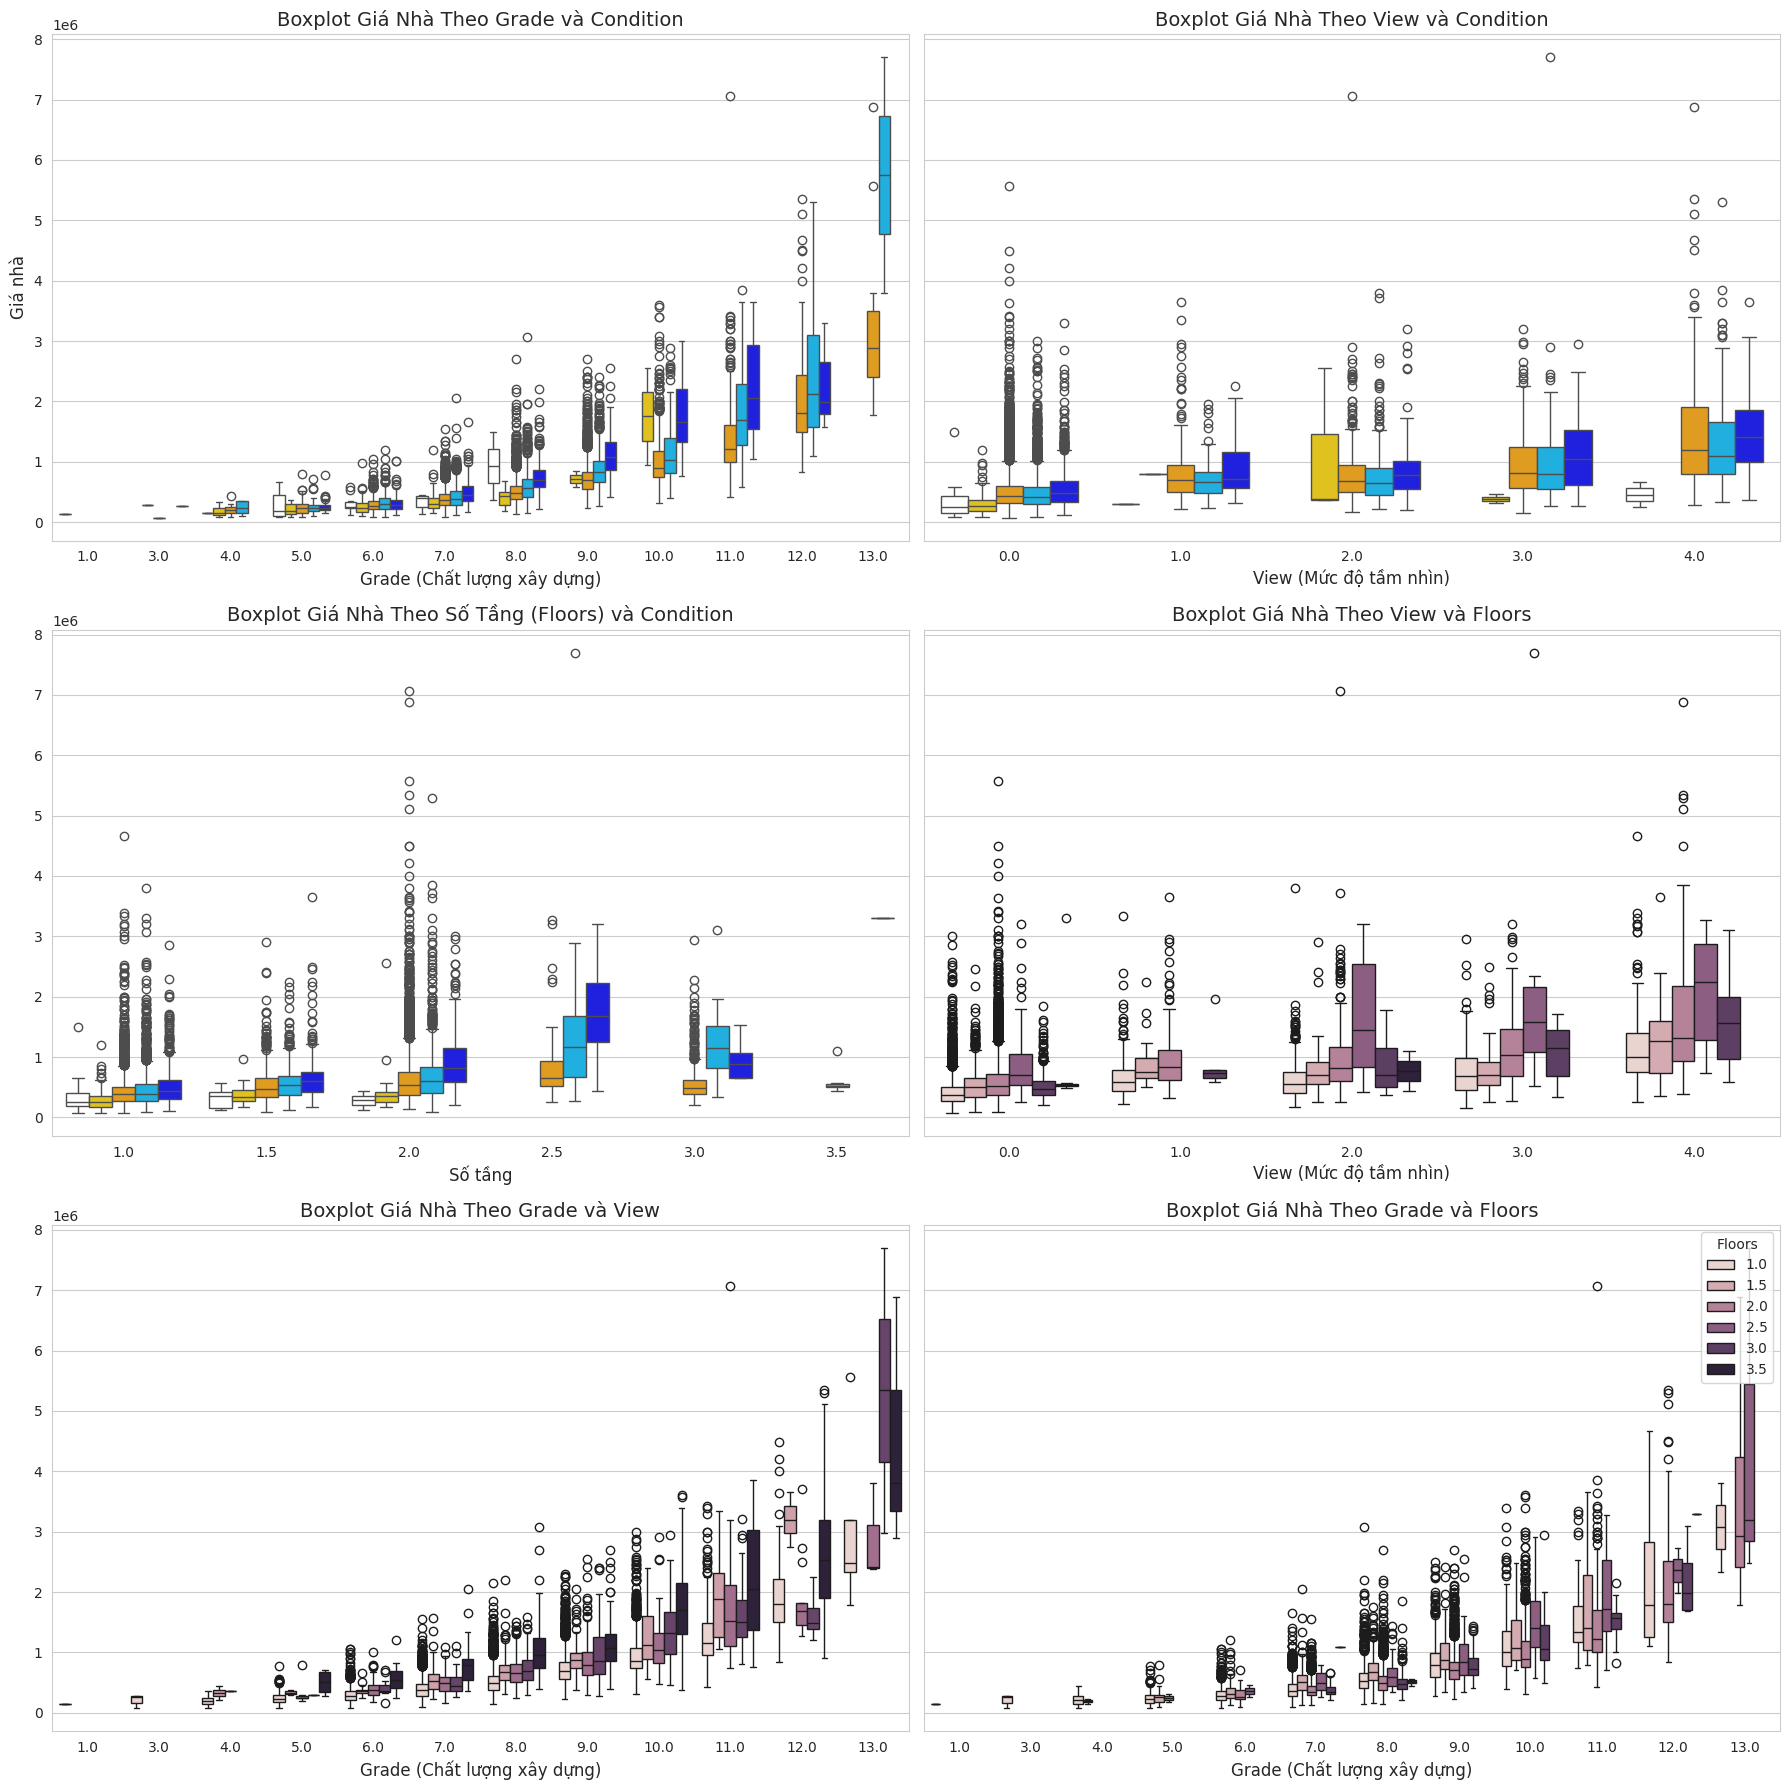

In [85]:
# Tùy chỉnh bảng màu gradient theo condition (1 → 5)
custom_palette = {
    1: "#ffffff",  # Trắng
    2: "#ffd700",  # Vàng
    3: "#ffa500",  # Cam
    4: "#00bfff",  # Xanh da trời
    5: "#0000ff",  # Xanh dương
}

fig, axes = plt.subplots(3, 2, figsize=(18, 18), sharey=True)
axes = axes.flatten()

# 1. Price vs Grade (hue = Condition)
sns.boxplot(ax=axes[0], x='grade', y='price', hue='condition', data=df, palette=custom_palette)
axes[0].set_title('Boxplot Giá Nhà Theo Grade và Condition', fontsize=14)
axes[0].set_xlabel('Grade (Chất lượng xây dựng)', fontsize=12)
axes[0].set_ylabel('Giá nhà', fontsize=12)
axes[0].legend_.remove()

# 2. Price vs View (hue = Condition)
sns.boxplot(ax=axes[1], x='view', y='price', hue='condition', data=df, palette=custom_palette)
axes[1].set_title('Boxplot Giá Nhà Theo View và Condition', fontsize=14)
axes[1].set_xlabel('View (Mức độ tầm nhìn)', fontsize=12)
axes[1].set_ylabel('')
axes[1].legend_.remove()

# 3. Price vs Floors (hue = Condition)
sns.boxplot(ax=axes[2], x='floors', y='price', hue='condition', data=df, palette=custom_palette)
axes[2].set_title('Boxplot Giá Nhà Theo Số Tầng (Floors) và Condition', fontsize=14)
axes[2].set_xlabel('Số tầng', fontsize=12)
axes[2].set_ylabel('')
axes[2].legend_.remove()

# 4. Price vs View (hue = Floors)
sns.boxplot(ax=axes[3], x='view', y='price', hue='floors', data=df)
axes[3].set_title('Boxplot Giá Nhà Theo View và Floors', fontsize=14)
axes[3].set_xlabel('View (Mức độ tầm nhìn)', fontsize=12)
axes[3].set_ylabel('Giá nhà', fontsize=12)
axes[3].legend_.remove()

# 5. Price vs Grade (hue = View)
sns.boxplot(ax=axes[4], x='grade', y='price', hue='view', data=df)
axes[4].set_title('Boxplot Giá Nhà Theo Grade và View', fontsize=14)
axes[4].set_xlabel('Grade (Chất lượng xây dựng)', fontsize=12)
axes[4].set_ylabel('')
axes[4].legend_.remove()

# 6. Price vs Grade (hue = Floors)
sns.boxplot(ax=axes[5], x='grade', y='price', hue='floors', data=df)
axes[5].set_title('Boxplot Giá Nhà Theo Grade và Floors', fontsize=14)
axes[5].set_xlabel('Grade (Chất lượng xây dựng)', fontsize=12)
axes[5].set_ylabel('')
# Hiển thị legend ở biểu đồ cuối cùng
handles, labels = axes[5].get_legend_handles_labels()
axes[5].legend(handles, labels, title="Floors", loc='upper right')

plt.tight_layout()
plt.show()
# Hàm xác định chỉ số outliers dựa trên 2 biến nhóm
def get_outlier_indices(df, g1, g2, target):
    outlier_indices = set()
    for v1 in df[g1].unique():
        for v2 in df[g2].unique():
            group_data = df[(df[g1] == v1) & (df[g2] == v2)][target]
            if len(group_data) < 5:
                continue
            q1 = group_data.quantile(0.25)
            q3 = group_data.quantile(0.75)
            iqr = q3 - q1
            lower = q1 - 1.5 * iqr
            upper = q3 + 1.5 * iqr
            mask = ((df[g1] == v1) & (df[g2] == v2) &
                    ((df[target] < lower) | (df[target] > upper)))
            outlier_indices.update(df[mask].index)
    return outlier_indices

# Xác định outliers từ 6 biểu đồ tổ hợp
out1 = get_outlier_indices(df, 'grade', 'condition', 'price')
out2 = get_outlier_indices(df, 'view', 'condition', 'price')
out3 = get_outlier_indices(df, 'floors', 'condition', 'price')
out4 = get_outlier_indices(df, 'view', 'floors', 'price')     # sửa lỗi ở đây
out5 = get_outlier_indices(df, 'grade', 'view', 'price')
out6 = get_outlier_indices(df, 'grade', 'floors', 'price')

# Giao của tất cả outliers – những điểm là outlier ở cả 6 biểu đồ
final_outliers = out1 & out2 & out3 & out4 & out5 & out6

# Xoá khỏi DataFrame gốc
df_cleaned_price = df.drop(index=final_outliers)



In [86]:
df_cleaned_price.info()
df_cleaned_price.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 21475 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21475 non-null  float64       
 1   date           21475 non-null  datetime64[ns]
 2   price          21475 non-null  float64       
 3   bedrooms       21475 non-null  float64       
 4   bathrooms      21475 non-null  float64       
 5   sqft_living    21475 non-null  float64       
 6   sqft_lot       21475 non-null  float64       
 7   floors         21475 non-null  float64       
 8   waterfront     21475 non-null  float64       
 9   view           21475 non-null  float64       
 10  condition      21475 non-null  float64       
 11  grade          21475 non-null  float64       
 12  sqft_above     21475 non-null  float64       
 13  sqft_basement  21475 non-null  float64       
 14  yr_built       21475 non-null  float64       
 15  yr_renovated   21475 non

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.147500e+04,21475,2.147500e+04,21475.000000,21475.000000,21475.000000,2.147500e+04,21475.000000,21475.000000,21475.000000,21475.000000,21475.000000,21475.000000,21475.000000,21475.000000,21475.000000,21475.000000,21475.000000,21475.000000,21475.000000,21475.000000
mean,4.582209e+09,2014-10-29 01:19:55.753201152,5.313861e+05,3.366286,2.108824,2070.007823,1.511383e+04,1.493295,0.007451,0.234412,3.410291,7.648289,1780.203632,289.804191,1971.020489,82.150547,98078.122002,47.559610,-122.213706,1980.437206,12768.554179
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123050e+09,2014-07-22 00:00:00,3.200000e+05,3.000000,1.500000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.469500,-122.329000,1480.000000,5100.000000
50%,3.904940e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.600000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.570800,-122.231000,1830.000000,7619.000000
75%,7.312300e+09,2015-02-17 00:00:00,6.390000e+05,4.000000,2.500000,2540.000000,1.062400e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,98118.000000,47.678300,-122.124000,2350.000000,10050.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876977e+09,NaN,3.458438e+05,0.928194,0.764891,907.055948,4.154621e+04,0.540074,0.085996,0.766485,0.651473,1.171089,819.075533,440.533139,29.353121,396.503593,53.477115,0.138876,0.141186,680.326523,27385.708415


Nếu loại bỏ outliers dựa trên toàn bộ tập dữ liệu, ta có thể vô tình loại đi những biến outliers nhưng phù hợp với thực tế ví dụ như căn nhà tuy có giá cao vượt trội (outliers), nhưng lại hợp lý vì sở hữu các đặc điểm tốt như chất lượng xây dựng cao, tầm nhìn đẹp, hoặc nhiều tầng.

Vì vậy, em đã thực hiện trực quan hóa dữ liệu bằng biểu đồ boxplot của giá nhà (price) theo từng cặp biến đặc trưng gồm: grade, condition, view và floors. Sau khi phân tích từng biểu đồ, em chỉ loại bỏ những điểm được xác định là outliers nếu chúng xuất hiện đồng thời trong nhiều biểu đồ, nhằm đảm bảo việc xử lý outliers được hợp lý và có chọn lọc hơn.

In [87]:
# Hàm nhóm diện tích sống
def assign_living_group(sqft):
    if sqft < 1100:
        return 1
    elif sqft <= 1680:
        return 2
    elif sqft <= 2350:
        return 3
    elif sqft <= 3250:
        return 4
    elif sqft <= 4150:
        return 5
    elif sqft <= 5100:
        return 6
    elif sqft <= 6500:
        return 7
    else:
        return 8

# Hàm xóa outliers theo nhóm
def remove_outliers_by_group(df, group_col, target_cols):
    cleaned_df = pd.DataFrame()
    for group in sorted(df[group_col].dropna().unique()):
        group_data = df[df[group_col] == group]
        for col in target_cols:
            Q1 = group_data[col].quantile(0.25)
            Q3 = group_data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            group_data = group_data[(group_data[col] >= lower) & (group_data[col] <= upper)]
        cleaned_df = pd.concat([cleaned_df, group_data], ignore_index=True)

    return cleaned_df.reset_index(drop=True)

# Áp dụng lên df_cleaned_price để lọc tiếp bedrooms, bathrooms theo từng nhóm diện tích
df_temp = df_cleaned_price.copy()
df_temp['living_group'] = df_temp['sqft_living'].apply(assign_living_group)

df_cleaned_room = remove_outliers_by_group(df_temp, 'living_group', ['bedrooms', 'bathrooms','sqft_basement','sqft_above'])

# Xóa cột phụ
df_cleaned_room.drop(columns=['living_group'], inplace=True)

# Kiểm tra kết quả
df_cleaned_room.info()
df_cleaned_room.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17358 entries, 0 to 17357
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             17358 non-null  float64       
 1   date           17358 non-null  datetime64[ns]
 2   price          17358 non-null  float64       
 3   bedrooms       17358 non-null  float64       
 4   bathrooms      17358 non-null  float64       
 5   sqft_living    17358 non-null  float64       
 6   sqft_lot       17358 non-null  float64       
 7   floors         17358 non-null  float64       
 8   waterfront     17358 non-null  float64       
 9   view           17358 non-null  float64       
 10  condition      17358 non-null  float64       
 11  grade          17358 non-null  float64       
 12  sqft_above     17358 non-null  float64       
 13  sqft_basement  17358 non-null  float64       
 14  yr_built       17358 non-null  float64       
 15  yr_renovated   1735

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.735800e+04,17358,1.735800e+04,17358.000000,17358.000000,17358.000000,1.735800e+04,17358.000000,17358.000000,17358.000000,17358.000000,17358.000000,17358.000000,17358.000000,17358.000000,17358.000000,17358.000000,17358.000000,17358.00000,17358.000000,17358.000000
mean,4.582528e+09,2014-10-28 05:21:42.868994048,5.427353e+05,3.406729,2.157694,2142.384261,1.556657e+04,1.511320,0.007317,0.235281,3.402927,7.737124,1861.856666,280.527595,1973.259074,75.192879,98074.097938,47.554724,-122.20319,2042.207973,13169.576679
min,1.200019e+06,2014-05-02 00:00:00,7.800000e+04,1.000000,0.750000,500.000000,6.090000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,500.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.51500,399.000000,651.000000
25%,2.123049e+09,2014-07-21 00:00:00,3.244625e+05,3.000000,1.750000,1510.000000,5.350500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1250.000000,0.000000,1955.000000,0.000000,98031.000000,47.455100,-122.31900,1530.000000,5399.250000
50%,3.905030e+09,2014-10-15 00:00:00,4.550000e+05,3.000000,2.250000,1990.000000,7.820000e+03,1.500000,0.000000,0.000000,3.000000,8.000000,1650.000000,0.000000,1977.000000,0.000000,98058.000000,47.566700,-122.21100,1910.000000,7800.000000
75%,7.312400e+09,2015-02-14 00:00:00,6.500000e+05,4.000000,2.500000,2570.000000,1.094450e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2300.000000,530.000000,1998.000000,0.000000,98116.000000,47.676975,-122.11400,2430.000000,10295.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,8.000000,8.000000,12050.000000,1.164794e+06,3.500000,1.000000,4.000000,5.000000,13.000000,8570.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.31500,6210.000000,871200.000000
std,2.876737e+09,NaN,3.592134e+05,0.785978,0.736859,922.929056,4.027892e+04,0.539024,0.085226,0.768733,0.642807,1.189473,836.235066,445.819323,28.342277,380.035576,52.894147,0.141445,0.14096,696.007614,27378.573823


Tương tự như với giá nhà, nếu loại bỏ outliers của bedrooms, bathrooms, sqft_basement, sqft_above một cách tổng thể, ta có thể xóa nhầm những căn nhà có nhiều phòng tắm, phòng ngủ cũng như có diện tích tầng hầm lớn, đây là điều hoàn toàn hợp lý đối với những căn nhà có diện tích lớn.

Vì vậy, em đã chia diện tích sử dụng (sqft_living) thành 8 nhóm từ nhỏ đến lớn thích hợp. Sau đó, em sử dụng biểu đồ boxplot để kiểm tra và loại bỏ outliers của bedrooms,bathrooms, sqft_basement, sqft_above trong từng nhóm diện tích riêng biệt. Cách tiếp cận này giúp đảm bảo việc xử lý outliers chính xác và phù hợp
ngữ cảnh thực tế của dữ liệu.

In [88]:
# Bước 1: Tạo nhóm giá
def assign_price_group(price):
    if price < 250000:
        return '1'
    elif price < 500000:
        return '2'
    elif price < 750000:
        return '3'
    elif price < 1000000:
        return '4'
    elif price < 1500000:
        return '5'
    elif price < 2000000:
        return '6'
    elif price < 4000000:
        return '7'
    else:
        return '8'

df_cleaned_room['price_group'] = df_cleaned_room['price'].apply(assign_price_group)

# Bước 2: Hàm xóa outliers theo nhóm giá (IQR)
def remove_outliers_by_price_group(df, group_col, target_cols):
    cleaned_df = pd.DataFrame()

    for group in sorted(df[group_col].dropna().unique()):
        group_data = df[df[group_col] == group].copy()

        for col in target_cols:
            Q1 = group_data[col].quantile(0.25)
            Q3 = group_data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower = Q1 - 1.5 * IQR
            upper = Q3 + 1.5 * IQR
            group_data = group_data[(group_data[col] >= lower) & (group_data[col] <= upper)]

        cleaned_df = pd.concat([cleaned_df, group_data], ignore_index=True)

    return cleaned_df.reset_index(drop=True)

# Bước 3: Áp dụng cho sqft_lot và sqft_lot15
target_columns = ['sqft_living','sqft_living15' ,'sqft_lot', 'sqft_lot15']
df_cleaned = remove_outliers_by_price_group(df_cleaned_room, 'price_group', target_columns)
df_cleaned.drop(columns=['price_group'], inplace=True)
# Bước 4: Kiểm tra

df_cleaned.info()
df_cleaned.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14720 entries, 0 to 14719
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             14720 non-null  float64       
 1   date           14720 non-null  datetime64[ns]
 2   price          14720 non-null  float64       
 3   bedrooms       14720 non-null  float64       
 4   bathrooms      14720 non-null  float64       
 5   sqft_living    14720 non-null  float64       
 6   sqft_lot       14720 non-null  float64       
 7   floors         14720 non-null  float64       
 8   waterfront     14720 non-null  float64       
 9   view           14720 non-null  float64       
 10  condition      14720 non-null  float64       
 11  grade          14720 non-null  float64       
 12  sqft_above     14720 non-null  float64       
 13  sqft_basement  14720 non-null  float64       
 14  yr_built       14720 non-null  float64       
 15  yr_renovated   1472

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.472000e+04,14720,1.472000e+04,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000,14720.000000
mean,4.753158e+09,2014-10-29 03:05:05.217391360,5.355619e+05,3.382609,2.121060,2052.656318,7541.560462,1.509715,0.006046,0.220992,3.406861,7.657880,1778.601698,274.054620,1972.273845,72.968274,98077.172690,47.560487,-122.218913,1970.206997,7354.649457
min,2.800031e+06,2014-05-02 00:00:00,8.100000e+04,1.000000,0.750000,500.000000,609.000000,1.000000,0.000000,0.000000,1.000000,4.000000,500.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.475000,620.000000,651.000000
25%,2.310108e+09,2014-07-22 00:00:00,3.190000e+05,3.000000,1.750000,1470.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1220.000000,0.000000,1953.000000,0.000000,98033.000000,47.475975,-122.327000,1500.000000,5075.500000
50%,4.083302e+09,2014-10-16 00:00:00,4.460000e+05,3.000000,2.250000,1930.000000,7286.500000,1.500000,0.000000,0.000000,3.000000,7.000000,1590.000000,0.000000,1976.000000,0.000000,98059.000000,47.571600,-122.229000,1840.000000,7378.000000
75%,7.504401e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2440.000000,9450.250000,2.000000,0.000000,0.000000,4.000000,8.000000,2180.000000,520.000000,1998.000000,0.000000,98117.000000,47.678325,-122.141000,2316.250000,9104.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,6.000000,8.000000,12050.000000,45517.000000,3.500000,1.000000,4.000000,5.000000,13.000000,8570.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5220.000000,28475.000000
std,2.871641e+09,NaN,3.589020e+05,0.778872,0.719094,848.606743,3682.126010,0.546972,0.077524,0.743480,0.647567,1.125554,763.601251,428.994463,29.295474,374.662505,53.688001,0.137350,0.131753,652.928293,3166.356356


Việc loại bỏ outliers của sqft_living, sqft_living15, sqft_lot và sqft_lot15 trên toàn bộ tập dữ liệu có thể khiến ta xóa nhầm những căn có diện tích lớn nhưng mức giá tương xứng – điều này hoàn toàn hợp lý với các biệt thự cao cấp.

Do đó, em đã chia dữ liệu thành 8 nhóm giá dựa trên biến price, từ dưới 250.000 đến trên 4 triệu đô. Sau đó, em sử dụng phương pháp IQR để phát hiện và loại bỏ outliers diện tích trong từng nhóm giá riêng biệt. Cách tiếp cận này giúp giữ lại những điểm dữ liệu hợp lý và phù hợp với đặc điểm thị trường thực tế của từng phân khúc bất động sản.

Sau khi xong bước xử lý bộ data còn 14720 dữ liệu (giảm 6893 dòng)


#4. EDA

##4.1 Những chỉ số chính của Data

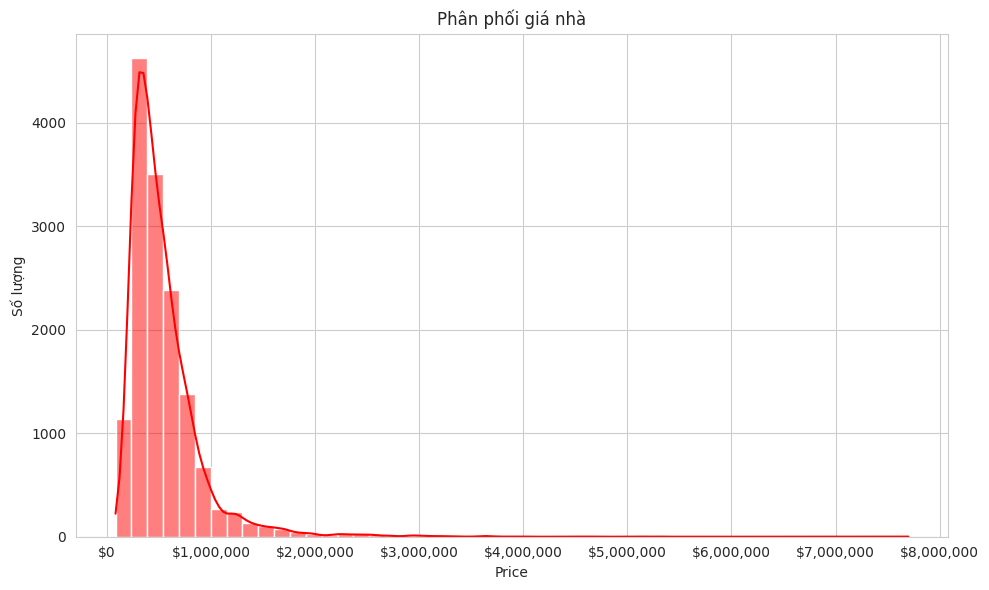

In [89]:
import matplotlib.ticker as ticker # Import the ticker module
plt.figure(figsize=(10, 6))
sns.histplot(
    data=df_cleaned,
    x='price',
    bins=50,
    kde=True,
    color='red'
)

# Nhãn và tiêu đề
plt.title('Phân phối giá nhà')
plt.xlabel('Price')
plt.ylabel('Số lượng')

# Định dạng trục x thành tiền tệ có dấu phẩy
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${int(x):,}'))

plt.tight_layout()
plt.show()

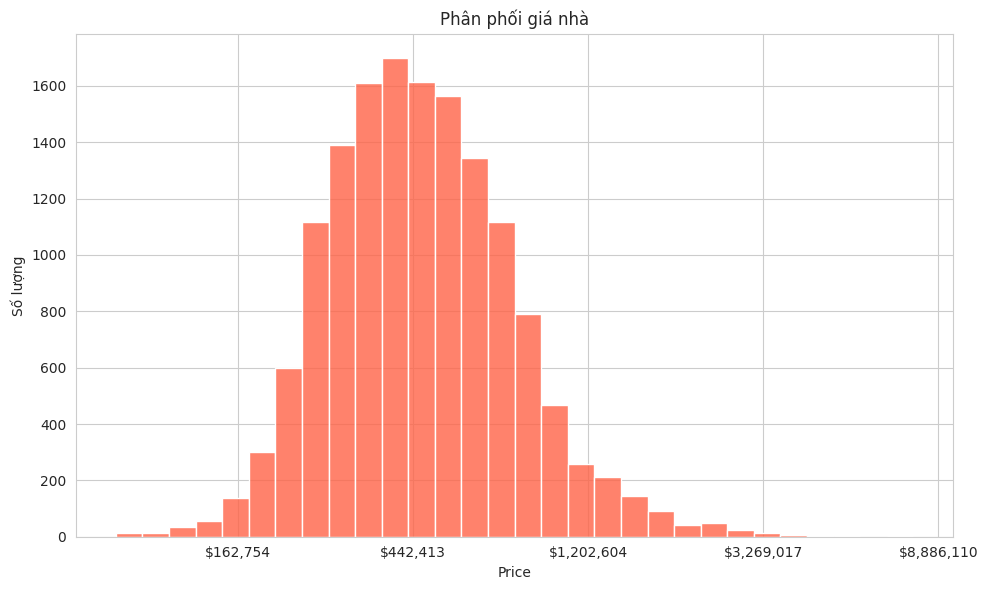

In [90]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(df_cleaned['price']), bins=30, color='tomato', alpha=0.8)

# Định dạng trục x về đơn vị giá gốc
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"${int(np.exp(x)):,}"))

# Nhãn và tiêu đề
plt.xlabel('Price')
plt.ylabel('Số lượng')
plt.title('Phân phối giá nhà')
plt.tight_layout()
plt.show()

Sử dụng biến đổi log (logarithmic transformation) đây là một kỹ thuật toán học được sử dụng nhằm điều chỉnh các biến có phân phối lệch (skewed distribution) trở nên gần với phân phối chuẩn hơn. Giúp dễ phân tích hơn.

Giá nhà phân bố tập trung trong khoảng từ 200.000 – 800.000USD.

Các căn giá trên $2 triệu là rất hiếm, chủ yếu là biệt thự hoặc nhà ở các khu cao cấp.



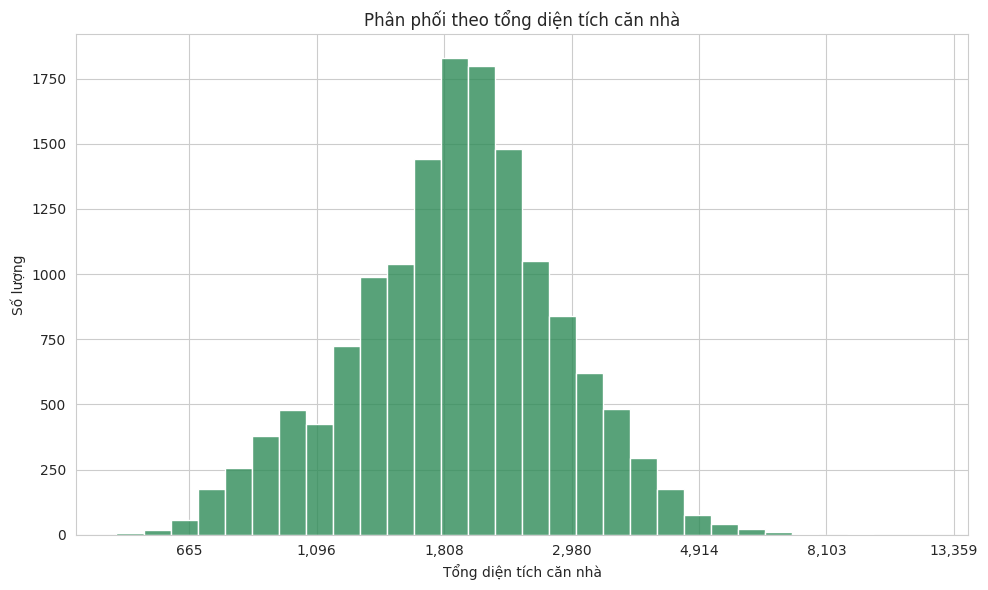

In [91]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log(df_cleaned['sqft_living']), bins=30, color='seagreen', alpha=0.8)

# Định dạng trục x về đơn vị giá gốc
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(np.exp(x)):,}"))


# Nhãn và tiêu đề
plt.xlabel('Tổng diện tích căn nhà')
plt.ylabel('Số lượng')
plt.title('Phân phối theo tổng diện tích căn nhà')
plt.tight_layout()
plt.show()

Phân phối phần lớn tập trung quanh mức 1.500 – 2.500 sqft.

Nhà diện tích lớn thường xuất hiện ít hơn nhưng lại đi kèm với phân khúc cao cấp và giá trị cao

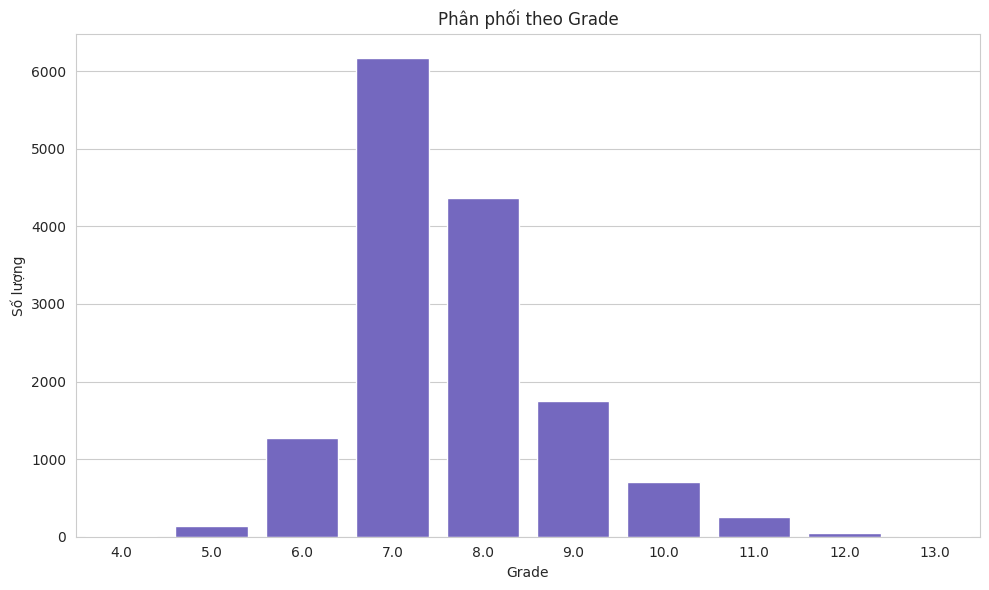

In [92]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_cleaned, x='grade', color='slateblue')
plt.xlabel('Grade')
plt.ylabel('Số lượng')
plt.title('Phân phối theo Grade')
plt.tight_layout()
plt.show()


Phần lớn các căn có chất lượng ở mức 7 và 8 – đây là phân khúc phổ biến, chiếm phần lớn thị trường.

Các căn có grade từ 10 trở lên rất ít, đại diện cho nhóm nhà cao cấp, thường có diện tích lớn và giá cao.

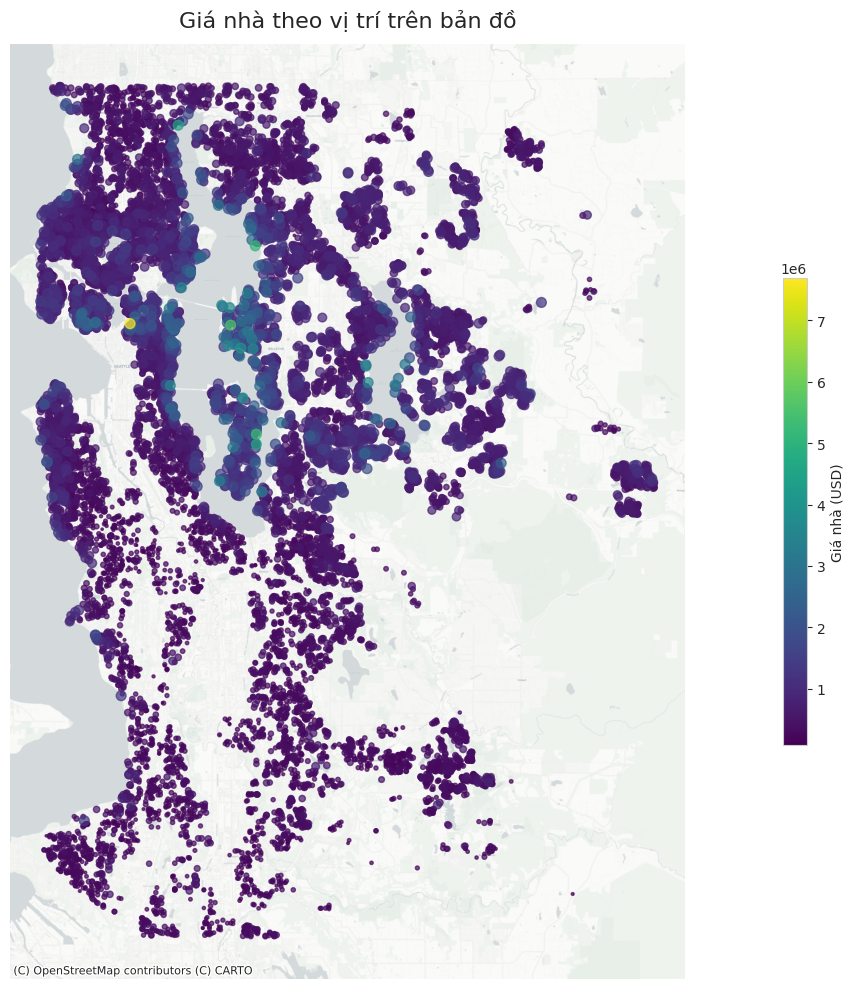

In [93]:
# === 1. Cài đặt phụ thuộc (chỉ cần chạy 1 lần nếu chưa có) ===
# !pip install geopandas contextily

import pandas as pd
import numpy as np
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
from shapely.geometry import Point

# === 2. Lọc vùng trung tâm (loại bỏ ~1% điểm ngoài rìa) ===
df = df_cleaned.copy()

lat_low, lat_high = df['lat'].quantile([0.01, 0.99])
lon_low, lon_high = df['long'].quantile([0.01, 0.99])

df_center = df[
    df['lat'].between(lat_low, lat_high) &
    df['long'].between(lon_low, lon_high)
].copy()

# === 3. Map giá thành kích thước (small → big) ===
# Giới hạn trên ở 95% để tránh vài điểm siêu cao làm kích thước lệch
p_min = df_center['price'].min()
p_max = df_center['price'].quantile(0.95)

# Clip giá và nội suy vào khoảng size [2, 50]
df_center['price_clip'] = df_center['price'].clip(upper=p_max)
df_center['size'] = np.interp(
    df_center['price_clip'],
    (p_min, p_max),
    (0.5, 50)
)

# === 4. Tạo GeoDataFrame chuyển sang Web Mercator ===
gdf = gpd.GeoDataFrame(
    df_center,
    geometry=gpd.points_from_xy(df_center['long'], df_center['lat']),
    crs="EPSG:4326"
).to_crs(epsg=3857)

# === 5. Vẽ bản đồ tĩnh với Contextily ===
fig, ax = plt.subplots(figsize=(20, 10))

# Scatter với size theo giá, màu theo giá
gdf.plot(
    ax=ax,
    markersize=gdf['size'],
    column='price',
    cmap='viridis',
    alpha=0.7,
    legend=True,
    legend_kwds={
        'label': "Giá nhà (USD)",
        'shrink': 0.5
    }
)

# Thêm nền bản đồ Carto Positron
ctx.add_basemap(
    ax,
    source=ctx.providers.CartoDB.Positron,
    zoom=13
)

# Bỏ khung trục, thêm tiêu đề
ax.set_axis_off()
ax.set_title(
    "Giá nhà theo vị trí trên bản đồ",
    pad=12,
    fontsize=16
)

plt.tight_layout()
plt.show()


Các căn có giá trị cao tập trung tại trung tâm Seattle, Bellevue và các khu ven hồ – đây là khu vực có vị trí thuận lợi và nhiều tiện ích.

Các vùng xa hơn hoặc nông thôn thường có mật độ nhà thấp hơn và giá trị nhà cũng thấp hơn rõ rệt.

Khuyến nghị:

Người mua:

Nếu tài chính vừa phải, nên ưu tiên những căn nhà có giá khoảng 400.000usd - 800.00usd để tận dụng nguồn cung dày và giá ổn định.

Diện tích 1 500–2 500 sqft, grade 7–8 là vùng lý tưởng giữa chất lượng và giá cả.

Các căn nhà ven hồ từ 2tr usd trở lên vừa có vị trí địa lý đẹp và grade cao - thuộc khu vực cao cấp, phù hợp với ai có tài chính tốt.

Người bán:

Những căn diện tích rộng, chất lượng cao nên làm nổi bật trong marketing vì có tiềm năng bán giá cao.

Nhấn mạnh grade 7-8, làm rõ ưu điểm giá tiền hợp lý và khả năng cải tạo nâng cấp chất lượng

Định giá cạnh tranh quanh mức trung bình của khu vực (trung tâm Seattle/Bellevue có giá cao hơn đáng kể) để thu hút người mua và tối ưu hóa thời gian bán.

Nhà đầu tư:

Các khu vực quanh trung tâm Seattle, Bellevue, và gần hồ là những điểm nóng có tiềm năng tăng giá.

Đầu tư cải tạo vào nhà có grade trung bình nhưng vị trí tốt có thể là chiến lược nâng giá hiệu quả.



##4.2. Giá nhà theo năm xây dựng và những ảnh hưởng của việc cải tạo

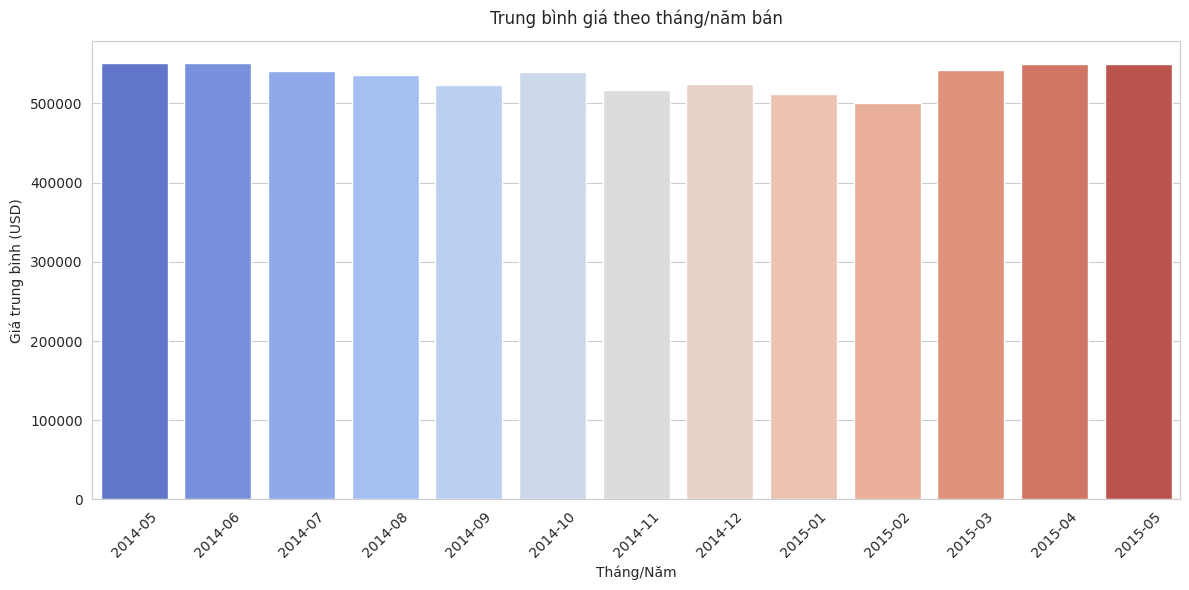

In [94]:
# Chuẩn bị dữ liệu
dates = pd.to_datetime(df_cleaned['date'])
df_cleaned['month_year'] = dates.dt.to_period('M').astype(str)

avg_price_by_monthyear = (
    df_cleaned
      .groupby('month_year')['price']
      .mean()
      .reset_index(name='avg_price')
)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=avg_price_by_monthyear,
    x='month_year',
    y='avg_price',
    hue='month_year',         # gán x vào hue để dùng palette
    palette='coolwarm',
    dodge=False               # không tách nhóm, giữ nguyên vị trí cột
)

# Trang trí
ax.set_title('Trung bình giá theo tháng/năm bán', pad=12)
ax.set_xlabel('Tháng/Năm')
ax.set_ylabel('Giá trung bình (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Dữ liệu mua bán chỉ kèo dài 1 năm nên không có biến động gì về giá.

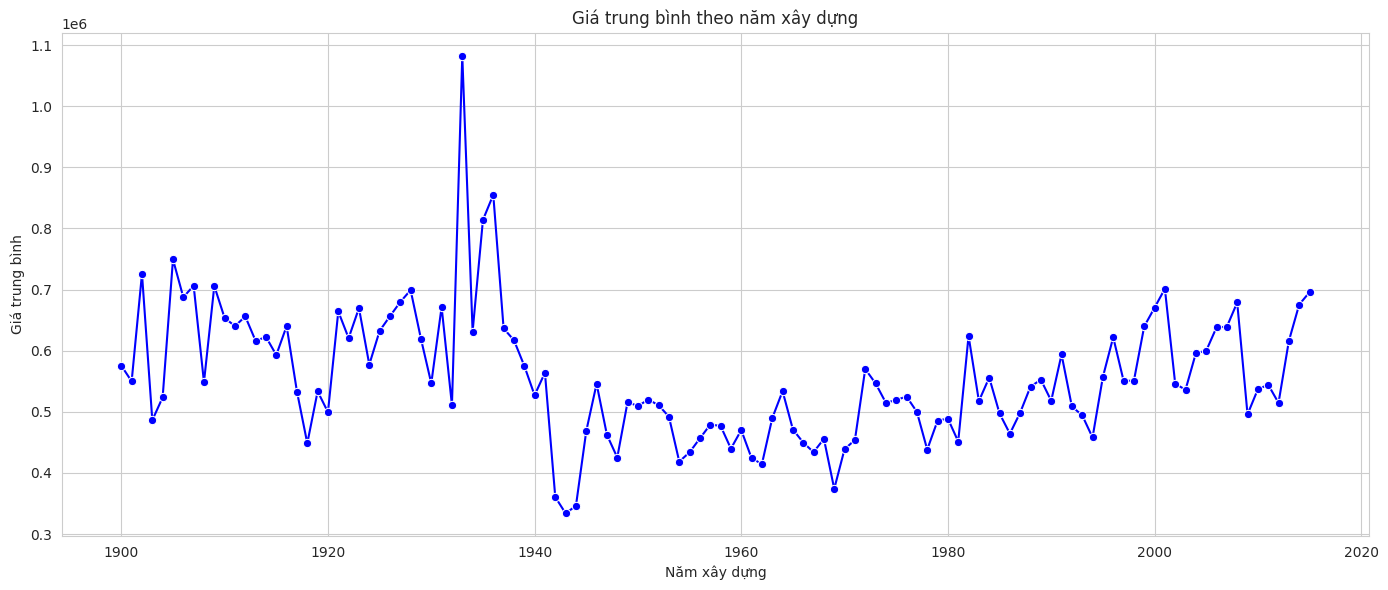

In [95]:
# Tính giá trung bình theo năm xây dựng
avg_price_by_yr_built = df_cleaned.groupby('yr_built')['price'].mean().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(14,6))
sns.lineplot(data=avg_price_by_yr_built, x='yr_built', y='price', marker='o', color='blue')

plt.title('Giá trung bình theo năm xây dựng')
plt.xlabel('Năm xây dựng')
plt.ylabel('Giá trung bình')
plt.grid(True)
plt.tight_layout()
plt.show()


Quan sát từ biểu đồ cho thấy yếu tố năm xây dựng không có ảnh hưởng lớn đến giá nhà, khi phần lớn mức giá dao động trong khoảng từ 400.000 đến 800.000 USD, bất kể căn nhà được xây vào thời điểm nào.

Tuy nhiên, giai đoạn 1930–1945 ghi nhận mức giá trung bình biến động bất thường – có năm giá cao đột biến, có năm lại giảm mạnh.

Để lý giải hiện tượng này, em tiếp tục vẽ thêm các biểu đồ liên quan đến chất lượng căn nhà (grade), vị trí gần mặt nước (waterfront) và tổng diện tích sử dụng – vì đây là các yếu tố có khả năng tác động mạnh đến giá nhà, bất kể thời điểm xây dựng.



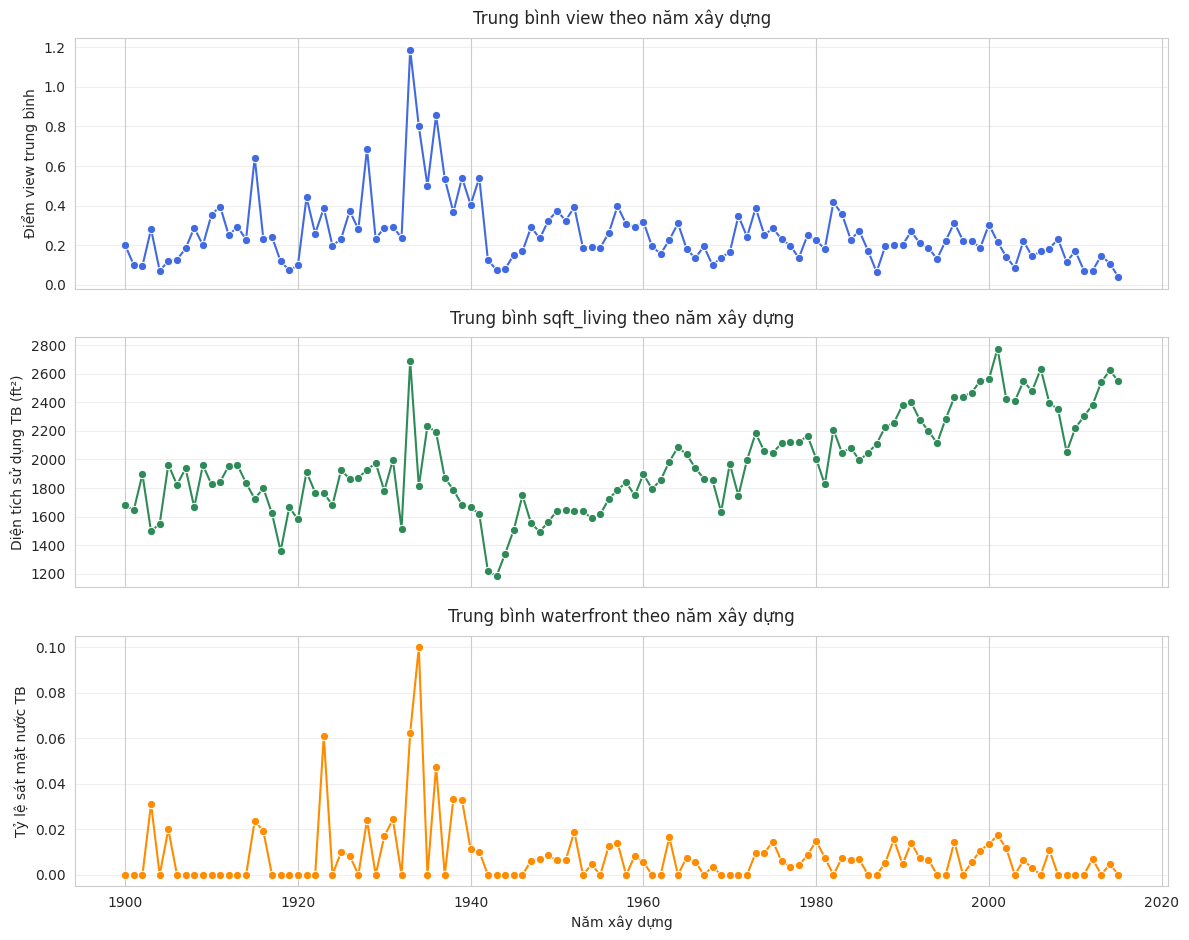

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")      # phông nền nhẹ

# ----- Khai báo cột muốn vẽ & nhãn tiếng Việt -----
targets = {
    "view": {
        "color": "royalblue",
        "ylabel": "Điểm view trung bình"
    },
    "sqft_living": {
        "color": "seagreen",
        "ylabel": "Diện tích sử dụng TB (ft²)"
    },
    "waterfront": {
        "color": "darkorange",
        "ylabel": "Tỷ lệ sát mặt nước TB"
    },
}

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 9.5), sharex=True)

for ax, (col, opts) in zip(axes, targets.items()):
    # 1) Tính giá trị trung bình theo năm xây dựng
    avg_by_year = (
        df_cleaned.groupby('yr_built')[col]
        .mean()
        .reset_index()
    )

    # 2) Vẽ đường
    sns.lineplot(
        data=avg_by_year,
        x='yr_built', y=col,
        marker='o', color=opts["color"],
        ax=ax
    )

    # 3) Trang trí subplot (Tiếng Việt)
    ax.set_title(f"Trung bình {col} theo năm xây dựng", pad=10)
    ax.set_ylabel(opts["ylabel"])
    ax.grid(True, axis='y', alpha=0.3)

# ----- Hoàn thiện bố cục -----
axes[-1].set_xlabel("Năm xây dựng")
plt.tight_layout()
plt.show()


Ba biểu đồ bổ sung gồm chất lượng căn nhà (grade), vị trí gần mặt nước (waterfront) và tổng diện tích căn nhà (sqft_living) theo thời gian cho thấy sự tương đồng đáng kể với xu hướng giá nhà theo năm xây dựng.

Cụ thể, những biến động bất thường trong khoảng năm 1930–1945 trên biểu đồ giá nhà – với các mức giá trung bình đột ngột tăng cao hoặc giảm mạnh – cũng xuất hiện ở các biểu đồ còn lại. Một số căn nhà trong giai đoạn này có diện tích lớn vượt trội, chất lượng xây dựng cao (grade cao), hoặc nằm gần mặt nước, vốn là các yếu tố có ảnh hưởng mạnh mẽ đến giá bán.

Điều này cho thấy rằng giá nhà tại một số thời điểm không chỉ phụ thuộc vào năm xây dựng, mà còn bị chi phối bởi các đặc điểm nội tại khác của bất động sản như chất lượng, diện tích và vị trí.

Do đó, những điểm “ngoại lệ” về giá trong giai đoạn này không nhất thiết phản ánh tác động của yếu tố thời gian, mà là hệ quả của các đặc điểm vật lý và vị trí cụ thể của từng căn nhà – từ đó làm rõ thêm mối quan hệ giữa các yếu tố và giúp tránh hiểu nhầm khi đánh giá dữ liệu theo từng biến độc lập.

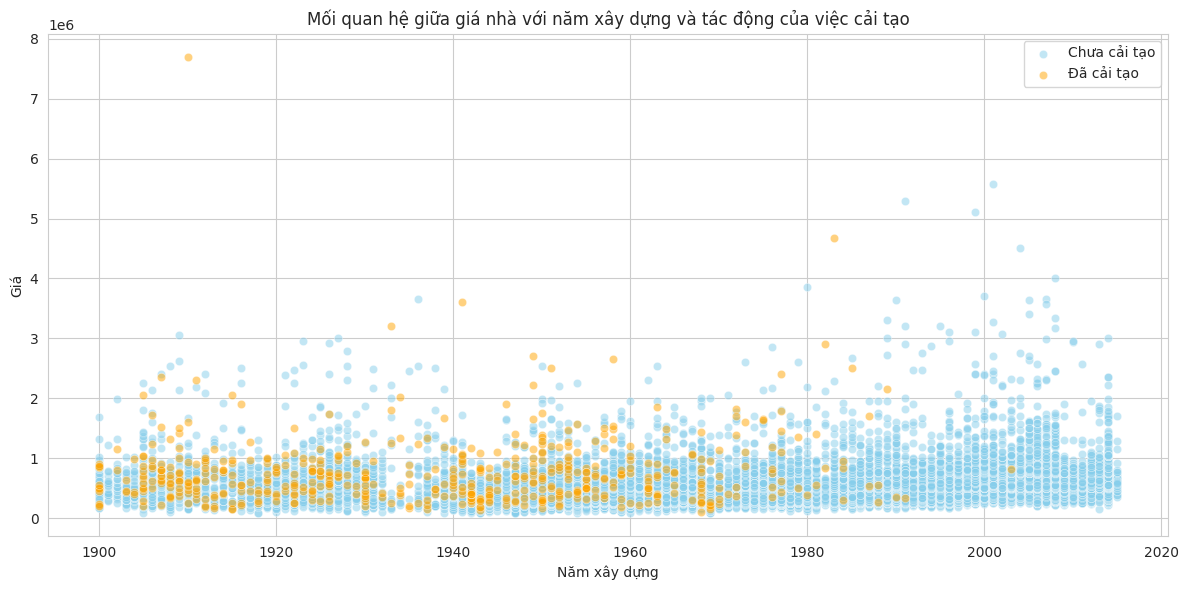

In [97]:
plt.figure(figsize=(12, 6))

# Vẽ điểm chưa từng renovate (yr_renovated == 0 hoặc 1)
sns.scatterplot(
    data=df_cleaned[df_cleaned['yr_renovated'] == 0],
    x='yr_built', y='price',
    color='skyblue', label='Chưa cải tạo', alpha=0.5
)

# Vẽ điểm đã renovate (yr_renovated > 1)
sns.scatterplot(
    data=df_cleaned[df_cleaned['yr_renovated'] > 1],
    x='yr_built', y='price',
    color='orange', label='Đã cải tạo', alpha=0.5
)

# Nhãn và tiêu đề
plt.title('Mối quan hệ giữa giá nhà với năm xây dựng và tác động của việc cải tạo')
plt.xlabel('Năm xây dựng')
plt.ylabel('Giá')
plt.legend()
plt.tight_layout()
plt.show()

Dựa vào biểu đồ phân tán thể hiện mối quan hệ giữa năm xây dựng và giá nhà theo hai nhóm “đã cải tạo” và “chưa cải tạo”, có thể nhận thấy rằng những căn nhà được cải tạo trước năm 1980 thường có mức giá cao hơn so với những căn chưa cải tạo cùng thời điểm.

Đặc biệt, nhiều căn nhà xây dựng trước năm 1980 vẫn đạt mức giá từ 2 triệu USD trở lên, cho thấy việc cải tạo có thể giúp gia tăng đáng kể giá trị tài sản, ngay cả đối với các công trình đã cũ. Điều này củng cố nhận định rằng yếu tố cải tạo đóng vai trò quan trọng đến giá trị nhà.

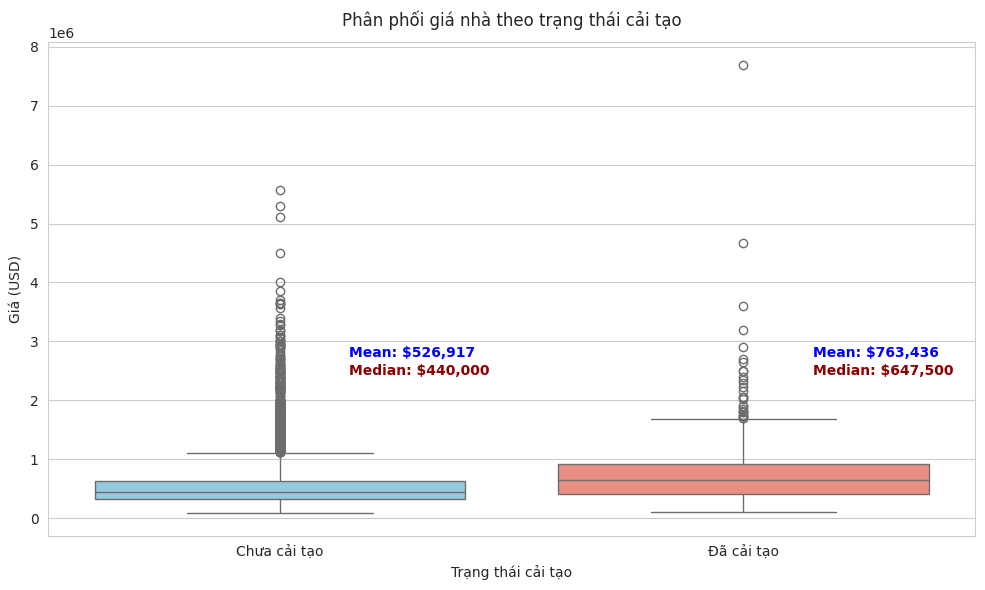

In [98]:
# Tạo cột phụ để vẽ
df_viz = df_cleaned.copy()
df_viz['renovated_status'] = df_viz['yr_renovated'].apply(lambda x: 'Đã cải tạo' if x > 0 else 'Chưa cải tạo')

plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    data=df_viz,
    x='renovated_status',
    y='price',
    hue='renovated_status',      # gán hue để palette có tác dụng
    palette=['skyblue', 'salmon'],
    dodge=False                  # không tách hai nhóm, chỉ dùng màu khác nhau
)
# Tính trung bình & trung vị
grouped = df_viz.groupby('renovated_status')['price'].agg(['mean', 'median'])

# Ghi chú mean/median
ymin, ymax = ax.get_ylim()
y_text = ymax - 0.65 * (ymax - ymin)
offset = 0.15

for i, status in enumerate(grouped.index):
    mean_val = int(grouped.loc[status, 'mean'])
    median_val = int(grouped.loc[status, 'median'])

    ax.text(i + offset, y_text + 100000, f"Mean: ${mean_val:,}", color='blue', fontsize=10, weight='bold')
    ax.text(i + offset, y_text - 200000, f"Median: ${median_val:,}", color='darkred', fontsize=10, weight='bold')
# Nhãn & tiêu đề
ax.set_title('Phân phối giá nhà theo trạng thái cải tạo', pad=12)
ax.set_xlabel('Trạng thái cải tạo')
ax.set_ylabel('Giá (USD)')

plt.tight_layout()
plt.show()


Biểu đồ boxplot thể hiện sự khác biệt rõ rệt về giá nhà giữa hai nhóm “đã cải tạo” và “chưa cải tạo”. Cụ thể, giá trung bình (mean) của nhóm đã cải tạo cao hơn khoảng 236,000 USD, trong khi giá trung vị (median) cũng tăng thêm hơn 200,000 USD. Điều này cho thấy rằng việc cải tạo không chỉ nâng cao giá trị trung bình mà còn đẩy mặt bằng giá chung lên đáng kể, khẳng định vai trò quan trọng của cải tạo trong việc gia tăng giá trị bất động sản.

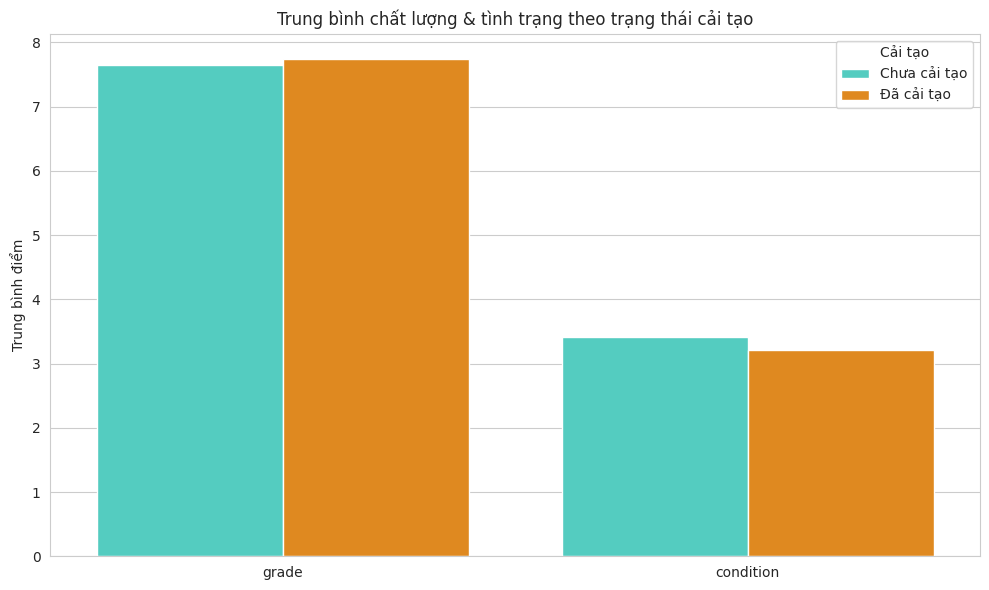

In [99]:
# 1. Tính trung bình
avg_values = (
    df_cleaned
      .assign(renovated=lambda d: (d['yr_renovated'] > 0).astype(int))
      .groupby('renovated')[['grade','condition']]
      .mean()
      .reset_index()
)

# 2. Melt để vẽ
avg_melt = avg_values.melt(
    id_vars='renovated', var_name='Feature', value_name='Average'
)

# 3. Chọn palette rõ ràng
palette = {0: 'turquoise', 1: 'darkorange'}

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=avg_melt,
    x='Feature', y='Average',
    hue='renovated', palette=palette,
    dodge=True
)

# 4. Việt hóa & trang trí
ax.set_title('Trung bình chất lượng & tình trạng theo trạng thái cải tạo')
ax.set_xlabel('')
ax.set_ylabel('Trung bình điểm')

# 5. Xoay (hoặc không xoay) tick mà không dùng set_xticklabels
ax.tick_params(axis='x', rotation=0)

# 6. Tạo legend mới
legend_labels = ['Chưa cải tạo', 'Đã cải tạo']
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, legend_labels, title='Cải tạo', loc='upper right')

plt.tight_layout()
plt.show()


Khi phân tích thêm biểu đồ cột thể hiện mối liên hệ giữa việc cải tạo với hai yếu tố chất lượng nhà (grade) và điều kiện vật lý (condition), có thể thấy rằng tỉ lệ các cấp độ ở cả hai đặc điểm này gần như không thay đổi giữa nhóm đã cải tạo và chưa cải tạo. Tuy nhiên, ở 2 biểu đồ ở phía dưới đều được chứng minh cả “grade” và “condition”  là có ảnh hưởng mạnh đến giá nhà.

Sự chênh lệch về giá giữa hai nhóm cải tạo và chưa cải tạo, trong khi các đặc điểm chất lượng không đổi, cho thấy rằng người mua có xu hướng đánh giá cao những căn nhà đã cải tạo, có thể do yếu tố tâm lý hoặc cảm nhận về tính mới và sẵn sàng chi trả mức giá cao hơn. Tuy nhiên, mức giá này có khả năng vượt quá giá trị thực dựa trên các yếu tố vật lý cốt lõi.

Về phía người bán, nếu không muốn đầu tư quá nhiều chi phí vào nâng cấp cấu trúc, hãy chú trọng đến cải tạo thẩm mỹ, chỉnh trang không gian vẫn có thể tạo được ấn tượng tốt và bán được với giá cao hơn kỳ vọng, nhờ vào tác động tâm lý của người mua đối với trạng thái “đã cải tạo”.

Người Mua nên kiểm tra chất lượng cải tạo: Xác minh giấy phép, hồ sơ thi công và vật liệu đã dùng để đảm bảo công trình bền vững.

So sánh, đối chiếu giá thị trường với những căn tương đương chưa cải tạo để tránh trả “phí cải tạo” quá cao.











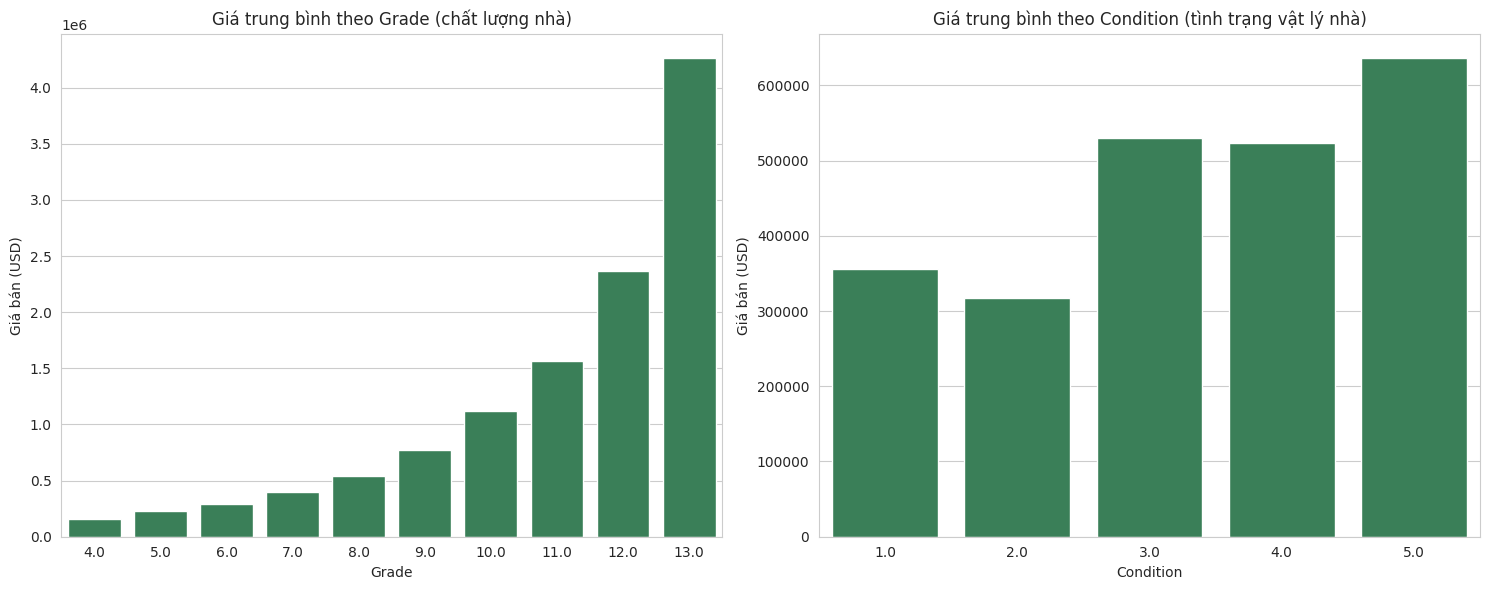

In [100]:
# Tạo khung vẽ với 1 dòng, 2 cột
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Giá trung bình theo Grade (chất lượng nhà)
sns.barplot(
    data=df_cleaned,
    x='grade', y='price',
    ax=axes[0],
    errorbar=None,      # Thay ci=None bằng errorbar=None
    color='seagreen'
)
axes[0].set_title('Giá trung bình theo Grade (chất lượng nhà)')
axes[0].set_xlabel('Grade')
axes[0].set_ylabel('Giá bán (USD)')

# Giá trung bình theo Condition (tình trạng vật lý nhà)
sns.barplot(
    data=df_cleaned,
    x='condition', y='price',
    ax=axes[1],
    errorbar=None,      # Thay ci=None bằng errorbar=None
    color='seagreen'
)
axes[1].set_title('Giá trung bình theo Condition (tình trạng vật lý nhà)')
axes[1].set_xlabel('Condition')
axes[1].set_ylabel('Giá bán (USD)')

plt.tight_layout()
plt.show()


Cả 2 biểu đồ đều cho thấy khi thang điểm về Grade và Condition tăng thì giá nhà cũng tăng lên đáng kể.

##4.3. Cấu trúc diện tích đất và tác động của chúng đến đặc tính cũng như giá trị căn nhà

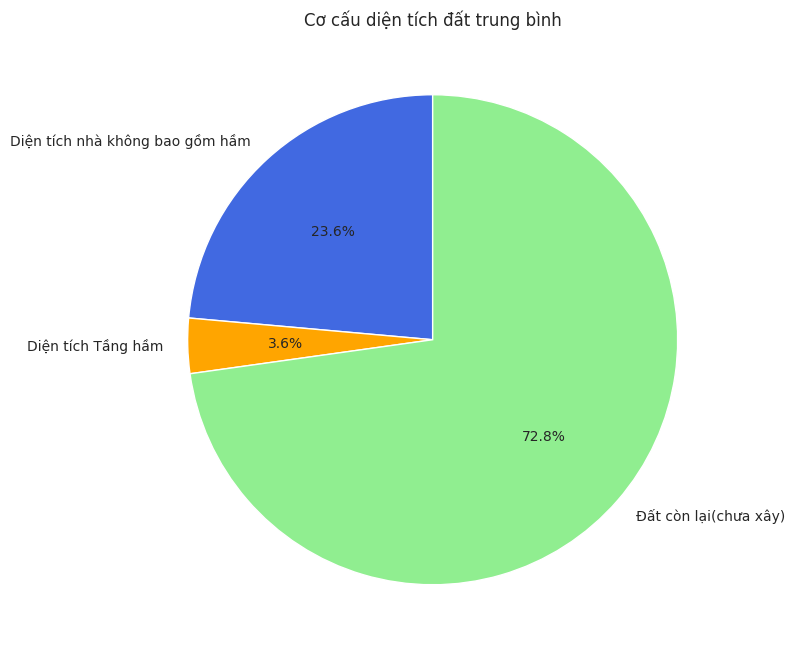

In [101]:
# Tính trung bình các phần
avg_lot = df_cleaned['sqft_lot'].mean()
avg_above = df_cleaned['sqft_above'].mean()
avg_basement = df_cleaned['sqft_basement'].mean()
avg_built = avg_above + avg_basement
avg_unbuilt = avg_lot - avg_built

# Dữ liệu vẽ
sizes = [avg_above, avg_basement, avg_unbuilt]
labels = ['Diện tích nhà không bao gồm hầm', 'Diện tích Tầng hầm', 'Đất còn lại(chưa xây)']
colors = ['royalblue', 'orange', 'lightgreen']

# Vẽ biểu đồ tròn
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Cơ cấu diện tích đất trung bình' )
plt.tight_layout()
plt.show()


Biểu đồ cho thấy cơ cấu diện tích đất trung bình được sử dụng như sau: phần lớn diện tích đất (72.8%) vẫn chưa được xây dựng, chỉ khoảng 23.6% dành cho diện tích nhà (không bao gồm tầng hầm), và tầng hầm chiếm tỷ lệ nhỏ nhất với 3.6%.

Seattle và các vùng ngoại ô lân cận (như Bellevue) thường theo phong cách quy hoạch đô thị thưa (low-density zoning), tức là mỗi căn nhà được xây trên lô đất rộng, để lại nhiều khoảng trống làm sân vườn, gara, hoặc đất chưa xây.


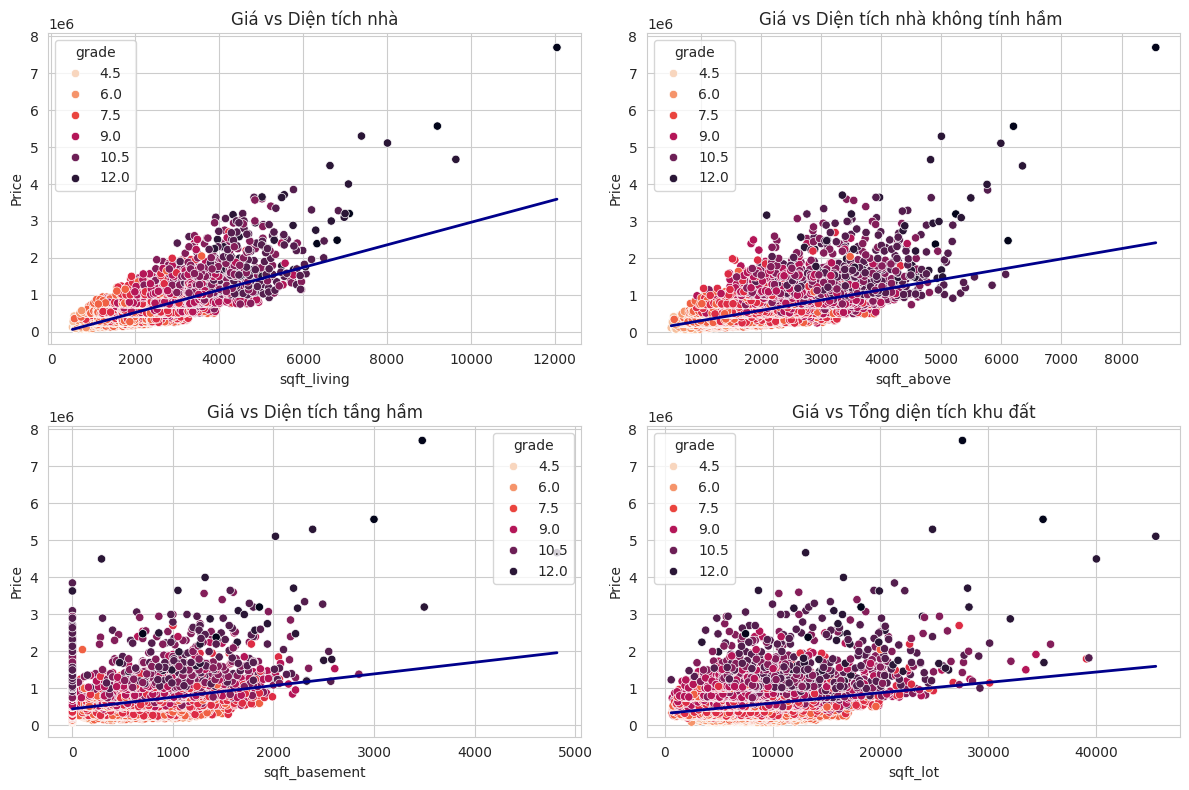

In [102]:
# Tạo khung 2x2 cho 4 biểu đồ
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2 hàng 2 cột
axes = axes.flatten()  # chuyển về mảng 1 chiều để dễ truy cập

# Danh sách các cặp trục x cần vẽ
x_vars = ['sqft_living', 'sqft_above', 'sqft_basement', 'sqft_lot']
titles = ['Giá vs Diện tích nhà', 'Giá vs Diện tích nhà không tính hầm ', 'Giá vs Diện tích tầng hầm', 'Giá vs Tổng diện tích khu đất']

# Vẽ từng biểu đồ
for i, (x_var, ax) in enumerate(zip(x_vars, axes)):
    # Vẽ scatterplot
    sns.scatterplot(
        data=df_cleaned,
        x=x_var,
        y='price',
        hue='grade',
        palette='rocket_r',
        ax=ax
    )

    # Vẽ đường hồi quy tuyến tính
    sns.regplot(
        data=df_cleaned,
        x=x_var,
        y='price',
        scatter=False,
        color='darkblue',  # màu đường
        line_kws={'linewidth': 2},  # độ dày đường
        ci=None,  # tắt vùng tin cậy
        ax=ax
    )

    # Đặt tiêu đề
    ax.set_title(titles[i])
    ax.set_xlabel(x_var)
    ax.set_ylabel("Price")

# Canh lề đẹp
plt.tight_layout()
plt.show()


Các biểu đồ trên cho thấy diện tích là yếu tố ảnh hưởng rõ rệt đến giá nhà. Trong đó, diện tích nhà (sqft_living) có tương quan mạnh nhất – diện tích càng lớn, giá càng cao, đặc biệt ở những căn có grade cao. Diện tích không bao gồm tầng hầm (sqft_above) cũng có xu hướng tương tự. Về diện tích tầng hầm và tổng diện tích đất tuy có ảnh hưởng nhưng phân tán còn khá nhiều.

Sau khi phân tích các biến liên quan đến diện tích, có thể thấy người mua thường ưu tiên diện tích sử dụng thực tế (như diện tích sinh hoạt) hơn là tổng diện tích khu đất. Tuy nhiên, những lô đất rộng vẫn mang lại tiềm năng đầu tư lớn nhờ phần đất trống có thể dùng để mở rộng, xây dựng hoặc phát triển trong tương lai. Đây là vấn đề người mua hoặc nhà đầu tư có thể cân nhắc.

Trong khi đó, người bán và mô giới có thể nhấn mạnh tiềm năng phát triển của khu đất về lâu dài trong chiến lược quảng bá để nâng cao giá trị căn nhà trong mắt người mua.

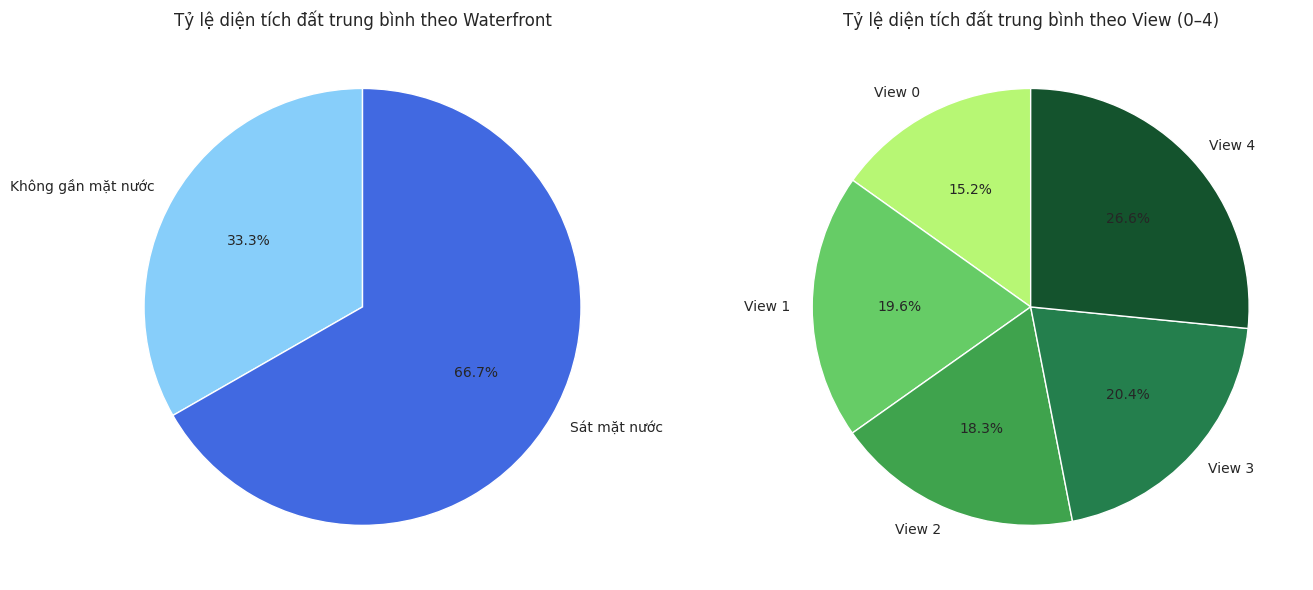

In [103]:
# Tính trung bình sqft_lot theo waterfront
lot_by_waterfront = df_cleaned.groupby('waterfront')['sqft_lot'].mean()

# Tính trung bình sqft_lot theo view
lot_by_view = df_cleaned.groupby('view')['sqft_lot'].mean()

# Danh sách màu đẹp (tuỳ chỉnh thủ công)
view_colors = ['#b7f774', '#66cc66', '#3fa34d', '#247f4d', '#14532d']
wf_colors = ['lightskyblue','royalblue']

# Vẽ 2 biểu đồ tròn cạnh nhau
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Biểu đồ 1: Waterfront
axes[0].pie(lot_by_waterfront,
            labels=['Không gần mặt nước', 'Sát mặt nước'],
            autopct='%1.1f%%',
            startangle=90,
            colors=wf_colors)
axes[0].set_title('Tỷ lệ diện tích đất trung bình theo Waterfront')

# Biểu đồ 2: View (0–4)
view_labels = [f'View {int(i)}' for i in lot_by_view.index]
axes[1].pie(lot_by_view,
            labels=view_labels,
            autopct='%1.1f%%',
            startangle=90,
            colors=view_colors)
axes[1].set_title('Tỷ lệ diện tích đất trung bình theo View (0–4)')

plt.tight_layout()
plt.show()


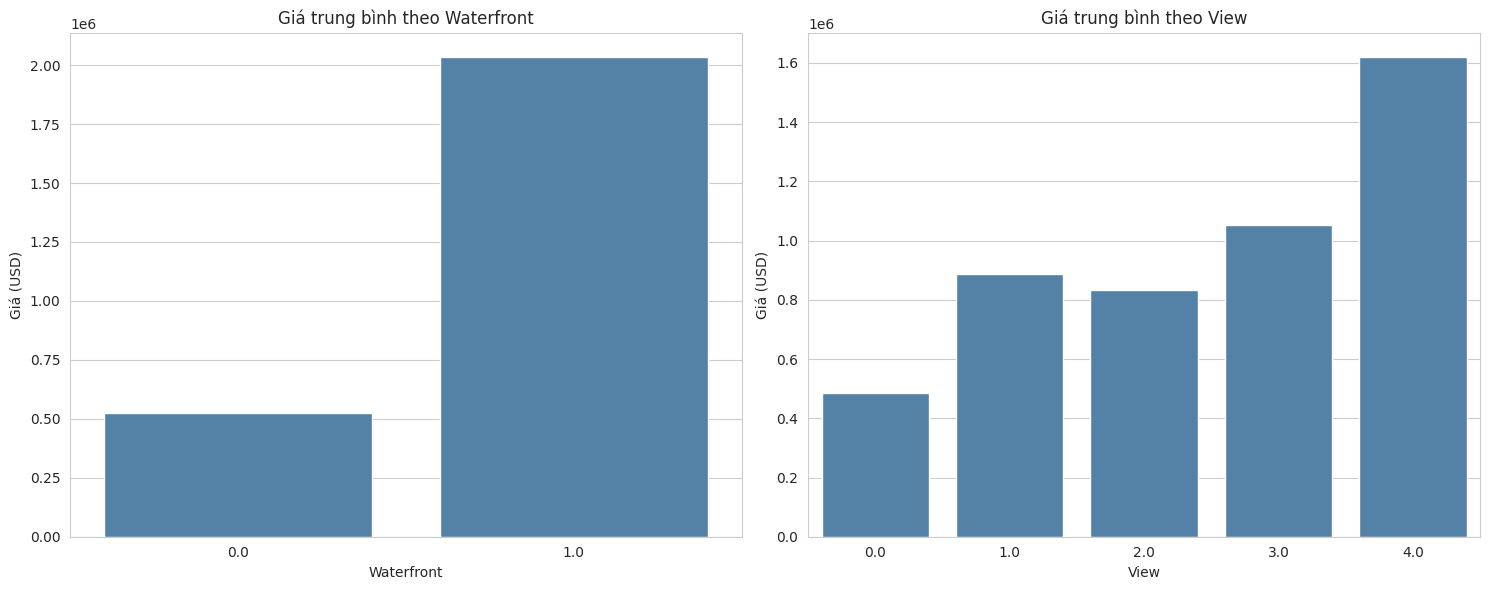

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Các biến ordinal cần vẽ
ordinal_vars = ['waterfront', 'view']

# Từ điển nhãn tiếng Việt
title_vi   = {'waterfront': 'Giá trung bình theo Waterfront',
              'view'      : 'Giá trung bình theo View'}
xlabel_vi  = {'waterfront': 'Waterfront',
              'view'      : 'View'}

# Tạo figure nằm ngang
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

for i, var in enumerate(ordinal_vars):
    sns.barplot(
        x=var, y='price',
        data=df_cleaned,
        estimator=np.mean,
        ax=axes[i],
        errorbar=None,        # không vẽ error bar
        color='steelblue'
    )
    axes[i].set_title(title_vi[var])
    axes[i].set_xlabel(xlabel_vi[var])
    axes[i].set_ylabel('Giá (USD)')

plt.tight_layout()
plt.show()


Waterfront (Gần sông): Những căn nhà gần mặt nước có diện tích đất trung bình lớn gấp đôi so với nhà không gần sông (66.7% vs 33.3%), đồng thời giá trung bình cao hơn gấp gần 4 lần. Điều này cho thấy nhà gần mặt nước không chỉ đắt hơn vì vị trí, mà còn do sở hữu quỹ đất lớn — một yếu tố thu hút người mua cao cấp.

View (0–4): Tương tự, view càng đẹp thì diện tích trung bình đất càng cao, đồng thời giá nhà cũng tăng đều theo mức độ view. View 4 có diện tích đất trung bình chiếm hơn 26%, và giá trung bình cao hơn 3 lần so với View 0.

Đối với người bán và môi giới, nên nhấn mạnh lợi thế về cảnh quan, tầm nhìn và vị trí gần sông trong quá trình định giá và tiếp thị sản phẩm. Những đặc điểm này không chỉ làm tăng giá trị và sức hút thực tế của căn nhà, mà còn mang lại tiềm năng đầu tư dài hạn – yếu tố mà nhiều nhà đầu tư sẽ cân nhắc khi quyết định mua.

Về phía người mua, cần xem xét kỹ khả năng tài chính và mục tiêu sử dụng bất động sản. Các yếu tố như view đẹp hay gần sông tuy hấp dẫn,nhưng tăng giá nhà lên rất nhiều mà các yếu tố này không phải là nhu cầu thiết yếu hay đặc tính cơ bản của một căn nhà. Do đó, hãy cân nhắc liệu những yếu tố này có thực sự phù hợp với mục đích sử dụng thực tế của bạn, hay chỉ là giá trị cộng thêm không quá cần thiết.

##4.4. Giá nhà theo số phòng ngủ, phòng tắm và số tầng

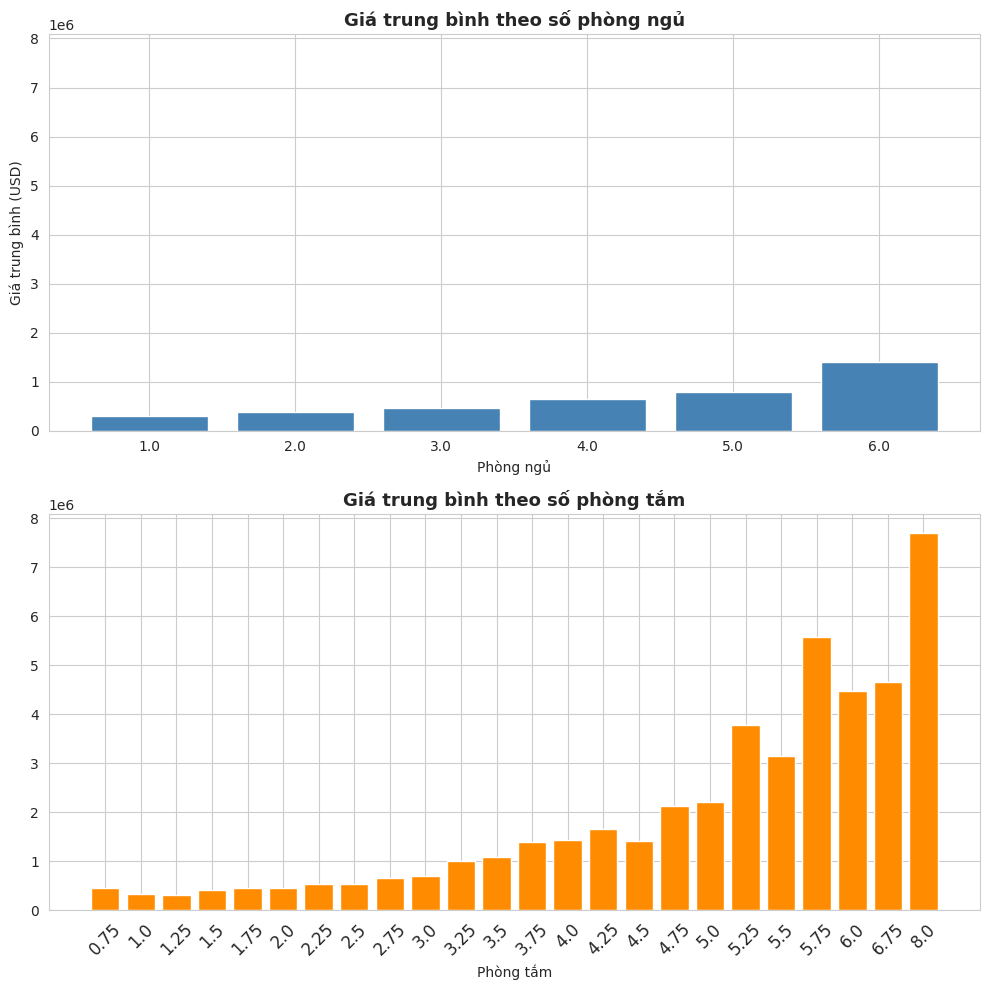

In [105]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 1, figsize=(10,10), sharey=True)

# --- Left subplot: Bedrooms ---
avg_by_bed = df_cleaned.groupby('bedrooms')['price'].mean()
axes[0].bar(avg_by_bed.index.astype(str), avg_by_bed.values, color='steelblue')
axes[0].set_title('Giá trung bình theo số phòng ngủ', fontsize=13, fontweight='bold')
axes[0].set_xlabel('Phòng ngủ')
axes[0].set_ylabel('Giá trung bình (USD)')
axes[0].tick_params(axis='x', rotation=0)

# --- Right subplot: Bathrooms ---
avg_by_bath = df_cleaned.groupby('bathrooms')['price'].mean()
# mặc dù bathrooms là số thập phân, ta vẫn vẽ đều cách
labels = list(map(str, avg_by_bath.index))
x_pos  = np.arange(len(labels))

axes[1].bar(x_pos, avg_by_bath.values, width=0.8, color='darkorange')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(labels, rotation=45, fontsize=12)
axes[1].set_title('Giá trung bình theo số phòng tắm', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Phòng tắm')

plt.tight_layout()
plt.show()


Biểu đồ bên trên cho thấy giá trung bình có xu hướng tăng dần khi số phòng ngủ nhiều lên, nhưng mức độ tăng khá đều và chưa có “đột phá” đáng kể. Trong khi đó, biểu đồ bên dưới cho thấy giá nhảy vọt mạnh mẽ khi số phòng tắm vượt ngưỡng 4 trở lên, với sự gia tăng rõ ràng hơn rất nhiều so với phòng ngủ.

Kết luận

Phòng tắm là yếu tố tác động mạnh mẽ hơn đến giá nhà: mỗi phòng tắm thêm vào, đặc biệt là từ 4 phòng tắm trở đi, đều kéo giá lên một bậc cao hơn rõ rệt.

Phòng ngủ tuy cũng tăng giá theo số lượng, nhưng diễn biến “êm” hơn và không tạo ra bước nhảy giá lớn.

Với người bán, việc đầu tư cải tạo phòng tắm có thể là chiến lược nâng giá hiệu quả hơn. Với người mua, nên cân nhắc nhu cầu sử dụng thực tế để tránh trả thêm cho những tiện ích chưa chắc cần thiết.

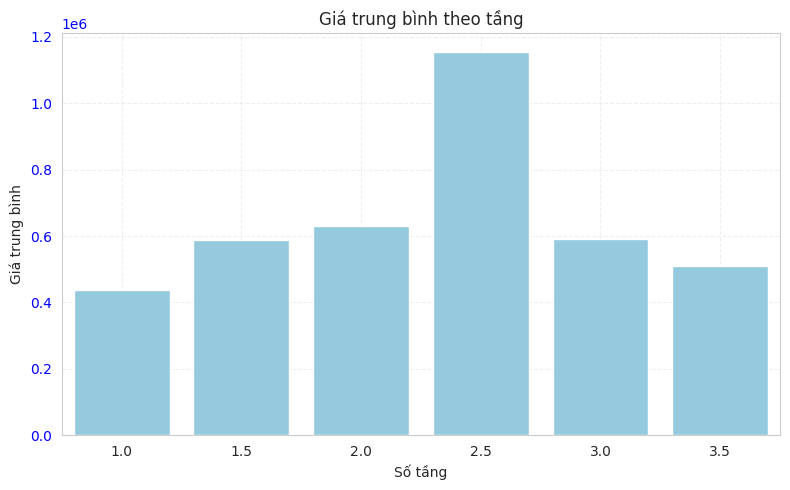

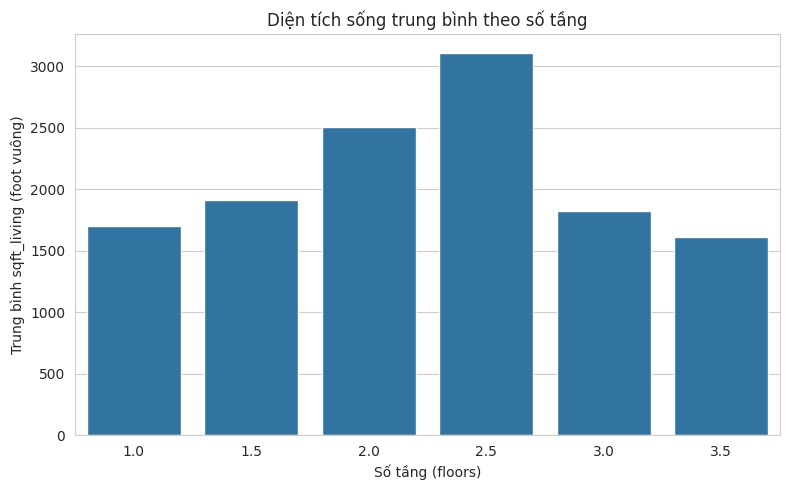

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tính giá và grade trung bình theo số tầng
avg_data = df_cleaned.groupby('floors')[['price', 'grade']].mean().reset_index()

# Tạo 2 biểu đồ stacked dọc
fig, axes = plt.subplots(1, 1, figsize=(8,5), sharex=True)

# --- Biểu đồ 1: Chỉ Bar chart của Price ---
sns.barplot(x='floors', y='price', data=avg_data, ax=axes, color='skyblue')
axes.set_ylabel('Giá trung bình')
axes.set_xlabel('Số tầng')
axes.tick_params(axis='y', labelcolor='blue')
axes.set_title('Giá trung bình theo tầng')
axes.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()
# Tính trung bình sqft_living theo floors (không thêm cột mới)
avg_sqft_by_floor = df_cleaned.groupby('floors')['sqft_living'].mean().reset_index()
avg_sqft_by_floor.columns = ['floors', 'avg_sqft_living']

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_sqft_by_floor, x='floors', y='avg_sqft_living')
plt.title('Diện tích sống trung bình theo số tầng')
plt.xlabel('Số tầng (floors)')
plt.ylabel('Trung bình sqft_living (foot vuông)')
plt.tight_layout()
plt.show()

Từ biểu đồ, có thể thấy nhà có 2.5 tầng có giá trung bình cao vượt trội so với các mức tầng khác. Tuy nhiên, mức giá ở các tầng còn lại không chênh lệch nhiều. Do đó, cần xem xét thêm yếu tố diện tích sống trung bình, cho thấy nhà 2–2.5 tầng cũng có diện tích lớn nhất.
Có thể kết luận rằng không phải nhiều tầng là giá sẽ tăng mà phải xem tổng diện tích của từng tầng là như thế nào. Vì vậy, khi đánh giá giá trị nhà theo tầng, người mua và người bán cần đồng thời cân nhắc yếu tố diện tích sử dụng để có cái nhìn đầy đủ và chính xác hơn.




#5. Correlation

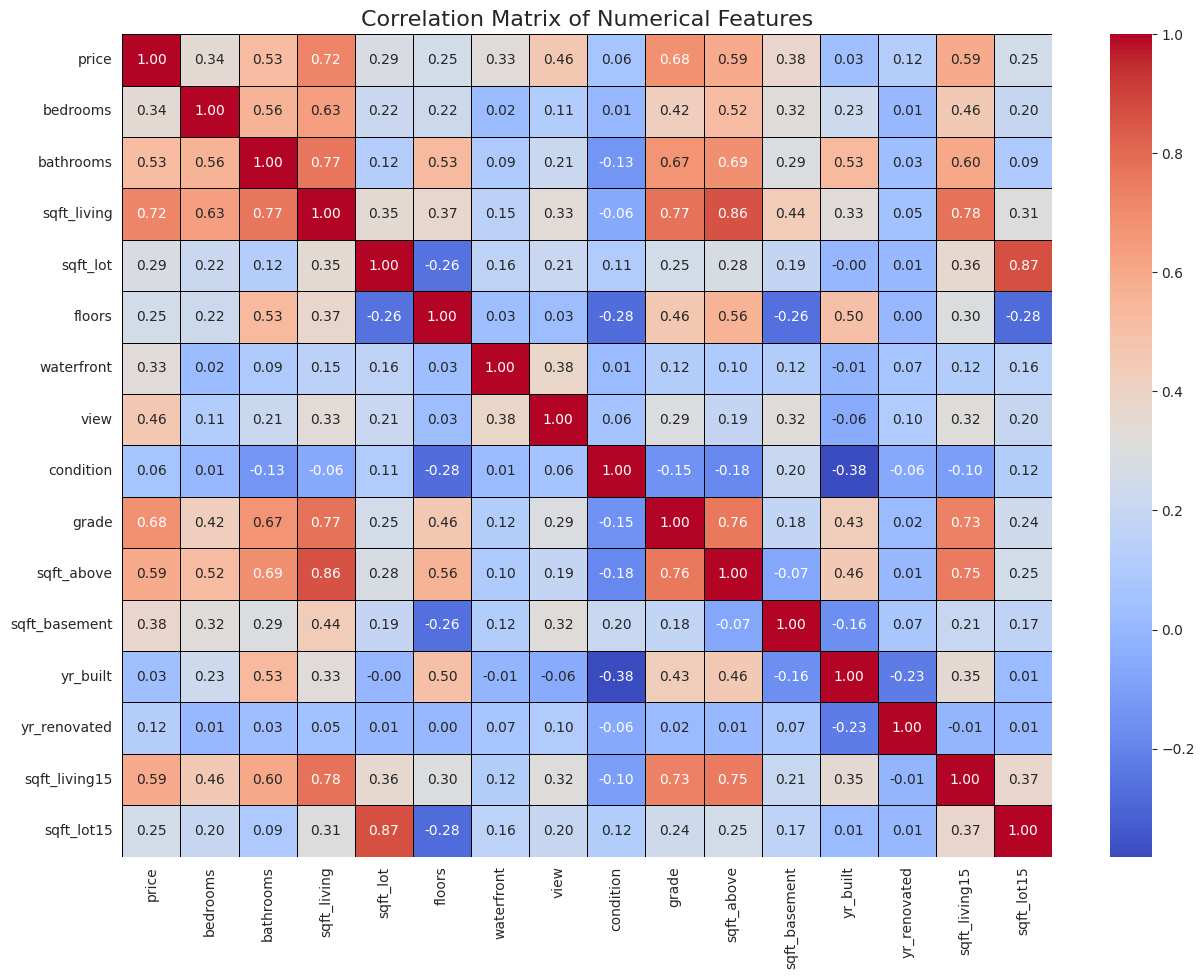

In [107]:

# Removed the trailing comma to make it a list instead of a tuple containing a list
numeric_columns = ["date", "price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement", "yr_built", "yr_renovated", "sqft_living15", "sqft_lot15"]

# Ensure 'date' is not included in the correlation calculation as it's datetime
# Create a temporary list excluding 'date' for correlation
cols_for_corr = [col for col in numeric_columns if col != 'date']

# Calculate correlation matrix using the list without 'date'
correlation_matrix = df_cleaned[cols_for_corr].corr()

# Vẽ heatmap
plt.figure(figsize=(15, 10.68))  # Kích thước lớn cho dễ nhìn
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",                   # Làm tròn 2 chữ số
    cmap="coolwarm",             # Màu sắc đẹp
    linewidths=0.6,              # Đường viền giữa các ô
    linecolor="black"            # Màu viền
)
plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.show()

Xem xét không đưa 2 biến sqft_living15 và sqft_lot15 vào Linear Regression vì hai biến này có tương quan lớn với sqft_living và sqft_lot. Mà 2 biến bị loại này chỉ phản ánh diện tích trung bình của những căn nhà lân cận trong khu vực, mang tính gián tiếp và không đặc trưng cho căn nhà đang xét.

#6. Linear Regression & Forecasting

##6.1. Linear Regression

In [108]:
from sklearn.model_selection import train_test_split
# Chọn các cột số phù hợp (loại bỏ 'date')
x = df_cleaned[[
    "bedrooms", "bathrooms", "sqft_living","sqft_lot", "floors",
    "waterfront", "view", "condition", "grade",
    "sqft_basement", "yr_built", "yr_renovated", "sqft_above"
]]
y = df_cleaned['price']

# Chia dữ liệu train-test
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Thêm hằng số vào x_train
X_train = sm.add_constant(X_train)

# Chuyển kiểu dữ liệu để tránh lỗi
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')

# Huấn luyện mô hình OLS
model = sm.OLS(y_train, X_train).fit()

# In kết quả
print(model.summary())
print(model.params.to_string(float_format='{:0.2f}'.format))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     2366.
Date:                Wed, 02 Jul 2025   Prob (F-statistic):               0.00
Time:                        09:14:36   Log-Likelihood:            -1.5991e+05
No. Observations:               11776   AIC:                         3.199e+05
Df Residuals:                   11763   BIC:                         3.200e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.873e+06    1.7e+05     34.599

Xóa 2 biến sqft_lot và yr_renovated ra khỏi mô hình vì có p_value > 0.05

In [109]:
from sklearn.model_selection import train_test_split
# Chọn các cột số phù hợp (loại bỏ 'date')
x = df_cleaned[[
    "bedrooms", "bathrooms", "sqft_living", "floors",
    "waterfront", "view", "condition", "grade",
    "sqft_basement", "yr_built", "sqft_above"
]]
y = df_cleaned['price']

# Chia dữ liệu train-test
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Thêm hằng số vào x_train
X_train = sm.add_constant(X_train)

# Chuyển kiểu dữ liệu để tránh lỗi
X_train = X_train.astype('float64')
y_train = y_train.astype('float64')

# Huấn luyện mô hình OLS
model = sm.OLS(y_train, X_train).fit()

# In kết quả (summary and params of model_first)
print(model.summary())
print(model.params.to_string(float_format='{:0.2f}'.format))


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     2839.
Date:                Wed, 02 Jul 2025   Prob (F-statistic):               0.00
Time:                        09:14:36   Log-Likelihood:            -1.5992e+05
No. Observations:               11776   AIC:                         3.199e+05
Df Residuals:                   11765   BIC:                         3.199e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.935e+06   1.61e+05     36.975

Mô hình được cảnh báo đang có đa cộng tuyến và hệ số bedrooms mang giá trị âm lớn là không hợp lý. Nên đã chuẩn hóa bằng 2 phương pháp Z-score và MaxMin

##6.2. Z-Score

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error # Import mean_squared_error

# Bước 1: Chọn biến đầu vào
features = ["bedrooms", "bathrooms", "sqft_living", "floors", "waterfront", "view",
            "condition", "grade", "sqft_basement", "yr_built"]


# Bước 2: Chuẩn hóa X_train, X_test
scaler = StandardScaler()
X_train_scaled_array = scaler.fit_transform(X_train[features])
X_test_scaled_array = scaler.transform(X_test[features])  # dùng transform thôi

# Đưa về DataFrame (với chỉ số khớp)
X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=features, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled_array, columns=features, index=X_test.index)

# Bước 3: Thêm constant & chạy OLS trên train
X_train_scaled_const = sm.add_constant(X_train_scaled)
model_scaled = sm.OLS(y_train, X_train_scaled_const).fit()
# Thêm constant vào test
X_test_scaled_const = sm.add_constant(X_test_scaled)

# Dự đoán và tính RMSE
y_test_pred = model_scaled.predict(X_test_scaled_const)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Bước 4: In kết quả
print(model_scaled.summary())
print(model_scaled.params.to_string(float_format='{:.2f}'.format))
print(f"Test RMSE: {rmse_test:,.2f}")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     2839.
Date:                Wed, 02 Jul 2025   Prob (F-statistic):               0.00
Time:                        09:14:36   Log-Likelihood:            -1.5992e+05
No. Observations:               11776   AIC:                         3.199e+05
Df Residuals:                   11765   BIC:                         3.199e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.366e+05   1762.390    304.494

##6.3. Min-Max

In [111]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split # Import train_test_split
import statsmodels.api as sm
import pandas as pd
import numpy as np # Import numpy


features = [
    "bedrooms", "bathrooms", "sqft_living", "floors", "waterfront", "view",
    "condition", "grade", "sqft_basement", "yr_built"
]

# Assuming X_train, X_test, y_train, y_test are already defined from a previous train_test_split

# Chuẩn hóa MinMax cho tập train
scaler = MinMaxScaler()
X_train_scaled_array = scaler.fit_transform(X_train[features])

# Giữ lại index gốc để khớp với y_train
X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=features, index=X_train.index)

# Add constant back after scaling for OLS
X_train_scaled_const = sm.add_constant(X_train_scaled)

# Hồi quy tuyến tính OLS
model_minmax = sm.OLS(y_train, X_train_scaled_const).fit() # Renamed variable

# In kết quả
print(model_minmax.summary()) # Updated variable name
print(model_minmax.params.to_string(float_format='{:.2f}'.format)) # Updated variable name

# --- Scale tập test ---
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test[features]),  # dùng scaler đã fit với train
    columns=features,
    index=X_test.index
)

# Add constant to scaled test set
X_test_scaled_const = sm.add_constant(X_test_scaled)


# --- Dự đoán trên test ---
y_pred_test = model_minmax.predict(X_test_scaled_const) # Updated variable name


# --- Tính RMSE on test ---
from sklearn.metrics import mean_squared_error


rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Test RMSE: {rmse_test:.2f}")

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     2839.
Date:                Wed, 02 Jul 2025   Prob (F-statistic):               0.00
Time:                        09:14:36   Log-Likelihood:            -1.5992e+05
No. Observations:               11776   AIC:                         3.199e+05
Df Residuals:                   11765   BIC:                         3.199e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           409.9178   1.21e+04      0.034

Cả 2 mô hình có R-squared tương tự nhưng hệ số bedrooms vẫn âm nên thử thêm mô hình khách để so sánh.

##6.4. Elastic Net Regression

In [112]:
from sklearn.linear_model import ElasticNet

features = [
    "bedrooms", "bathrooms", "sqft_living", "floors", "waterfront", "view",
    "condition", "grade", "sqft_basement", "yr_built"
]

# Dữ liệu đầu vào
x_train = X_train[features]
y_train = y_train  # đã có từ trước

# ElasticNet model
model = ElasticNet(alpha=0.1, l1_ratio=0.5)
model.fit(x_train, y_train)

# In hệ số
coefs = pd.Series(model.coef_, index=x_train.columns)
print(coefs[coefs != 0].sort_values())  # Chỉ in hệ số khác 0
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Giả sử bạn đã có x_train, y_train, x_test, y_test

# 1. Dự đoán
y_pred_train = model.predict(x_train)
# Nếu có test:
y_pred_test = model.predict(X_test[features]) # Uncomment this line


# 2. Tính R² và RMSE cho tập train
r2_train  = r2_score(y_train, y_pred_train)

print(f"Train R²:  {r2_train:.4f}")




bedrooms         -46586.220623
yr_built          -3411.454915
sqft_basement        12.654374
sqft_living         200.970121
condition         24490.545068
bathrooms         26918.334719
floors            31986.580528
waterfront        68727.707382
view              74338.629484
grade            114004.996979
dtype: float64
Train R²:  0.6888


R-squared thấp hơn mô hình đã test trước và bedrooms vẫn âm nên tiếp tục thử phương án khác

##6.5. Price/sqft

In [113]:
import statsmodels.api as sm

# Tạo biến Y mới: giá mỗi foot vuông
y_train_sqft = y_train / X_train['sqft_living']

# Chọn biến đầu vào từ tập train
features = [
    "bedrooms", "bathrooms", "floors", "waterfront", "view",
    "condition", "grade", "yr_built",'sqft_basement'
]
x_train_sqft = X_train[features]

# Thêm constant và ép kiểu float64
x_train_sqft = sm.add_constant(x_train_sqft)
x_train_sqft = x_train_sqft.astype('float64')

# Hồi quy tuyến tính
model = sm.OLS(y_train_sqft, x_train_sqft).fit()

# In kết quả
print(model.summary())
print(model.params.to_string(float_format='{:.2f}'.format))


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     669.6
Date:                Wed, 02 Jul 2025   Prob (F-statistic):               0.00
Time:                        09:14:36   Log-Likelihood:                -69431.
No. Observations:               11776   AIC:                         1.389e+05
Df Residuals:                   11766   BIC:                         1.390e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3310.3823     73.850     44.826

Ra giả định bedrooms âm vì trong thực tế những căn nhà 2 phòng ngủ thường có giá/ft vuông rẻ hơn căn 1 phòng ngủ. Nên thay biến phụ thuộc y từ price thành price/sqft. Tuy nhiên mô hình có S-squared thấp cùng với việc các biến còn lại thường có xu hướng ảnh hưởng đến tổng giá trị căn nhà nhiều hơn.

Tiếp tục chuẩn hóa mô hình.

In [114]:
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import pandas as pd

# --- 0) Giả sử X_train, X_test, y_train đã có từ train_test_split ---
# Và bạn đã tạo y_train_sqft = y_train / X_train['sqft_living']

# 1) Chọn biến đầu vào cho cả train và test
features = ["bedrooms", "bathrooms", "floors", "waterfront",
            "view", "condition", "grade", "yr_built", "sqft_basement"]

X_train_sqft = X_train[features].copy()
X_test_sqft  = X_test [features].copy()   # <<< tạo X_test_sqft tại đây

# 2) Scale Min–Max
scaler = MinMaxScaler()

X_train_sqft = pd.DataFrame(
    scaler.fit_transform(X_train_sqft),
    columns=features, index=X_train.index
)
X_test_sqft = pd.DataFrame(
    scaler.transform(X_test_sqft),
    columns=features, index=X_test.index
)

# 3) Thêm constant
X_train_sqft = sm.add_constant(X_train_sqft, has_constant='add')
X_test_sqft  = sm.add_constant(X_test_sqft,  has_constant='add')

# 4) Fit OLS với y_train_sqft
model = sm.OLS(y_train_sqft, X_train_sqft).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     669.6
Date:                Wed, 02 Jul 2025   Prob (F-statistic):               0.00
Time:                        09:14:37   Log-Likelihood:                -69431.
No. Observations:               11776   AIC:                         1.389e+05
Df Residuals:                   11766   BIC:                         1.390e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           299.4957      5.367     55.800

Mô hình vẫn xấu, nên chuyển sang giả định và mô hình khác

## 6.6. Tạo biến x mới sqft/bedrooms

Sẽ gộp 2 biến độc lập bedrooms và sqft_above về thành 1. Bằng cách lấy sqft_above/bedrooms. Hệ số này cho thấy tỉ lệ diện tích trên phòng ngủ, tức là độ rộng rải của 1 căn nhà khi xét trên diện tích và phòng ngủ.

Cùng diện tích nhưng nhiều phòng ngủ hơn → tỷ lệ giảm → nhà chật hơn.

Cùng số phòng ngủ nhưng diện tích lớn hơn → tỷ lệ tăng → nhà rộng rãi hơn.

In [115]:
import statsmodels.api as sm

# Ensure X_train, X_test, y_train, y_test are already defined from a previous train_test_split

# Select features for the model
features_for_model = [
    "bathrooms", "floors", "waterfront", "view",
    "condition", "grade", "yr_built", "sqft_basement","sqft_living"
]

# Create training data for the interaction model
x_train_interact = X_train[features_for_model].copy()
# Add the interaction term using columns from X_train
x_train_interact['sqft/bedrooms'] = X_train['sqft_above'] / X_train['bedrooms']

# Target variable
y_train_interact = y_train

# Add constant and set data type
x_train_interact = sm.add_constant(x_train_interact)
x_train_interact = x_train_interact.astype('float64')

# Linear regression model
model1 = sm.OLS(y_train_interact, x_train_interact).fit()

# Print results
print(model1.summary())
print(model1.params.to_string(float_format='{:.2f}'.format))


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2773.
Date:                Wed, 02 Jul 2025   Prob (F-statistic):               0.00
Time:                        09:14:37   Log-Likelihood:            -1.6001e+05
No. Observations:               11776   AIC:                         3.200e+05
Df Residuals:                   11765   BIC:                         3.201e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.828e+06   1.62e+05     36.023

Tiếp tục chuẩn hóa mô hình xem có thay đổi gì không

In [116]:
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split


# Lấy biến đầu vào từ tập train
features_for_interaction = ["bathrooms", "floors", "waterfront", "view", "condition", "grade", "yr_built", "sqft_basement","sqft_living"]
x_train_interact = X_train[features_for_interaction].copy()

# Thêm biến tương tác
x_train_interact['sqft/bedrooms'] = X_train['sqft_above'] / X_train['bedrooms']

# Lấy biến đầu vào từ tập test
x_test_interact = X_test[features_for_interaction].copy()

# Thêm biến tương tác vào tập test
x_test_interact['sqft/bedrooms'] = X_test['sqft_above'] / X_test['bedrooms']


# Mục tiêu
y_train_interact = y_train

# Chuẩn hóa MinMax
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_interact)
x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train_interact.columns, index=x_train_interact.index) # Set the index to match x_train_interact

# Scale the test data using the same scaler
x_test_scaled = scaler.transform(x_test_interact)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test_interact.columns, index=x_test_interact.index)


# Thêm constant và ép kiểu
x_train_scaled_const = sm.add_constant(x_train_scaled)
x_train_scaled_const = x_train_scaled_const.astype('float64')

# Add constant to scaled test set
x_test_scaled_const = sm.add_constant(x_test_scaled)
x_test_scaled_const = x_test_scaled_const.astype('float64')


# Hồi quy
model_final = sm.OLS(y_train_interact, x_train_scaled_const).fit()

# In kết quả
print(model_final.summary())
print(model_final.params.to_string(float_format='{:.2f}'.format))

# ===== Dự đoán trên tập test =====
y_pred = model_final.predict(x_test_scaled_const)   # đã có cột const

# ===== Tính MSE và RMSE thủ công =====
mse  = np.mean((y_test - y_pred) ** 2)
rmse = np.sqrt(mse)

print(f"MSE : {mse:,.2f}")
print(f"RMSE: {rmse:,.2f}")


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2773.
Date:                Wed, 02 Jul 2025   Prob (F-statistic):               0.00
Time:                        09:14:37   Log-Likelihood:            -1.6001e+05
No. Observations:               11776   AIC:                         3.200e+05
Df Residuals:                   11765   BIC:                         3.201e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -8.38e+04   1.16e+04     -7.241

Mô hình có hệ số sqft/bedrooms dương như giả định, nhưng R-squared và RMSE không tốt bằng khi so với Mô Hình 6.3 (Min-Max)



##6.7. XGBOOST

XGBoost RMSE: 123,823.31
XGBoost R²:   0.8944


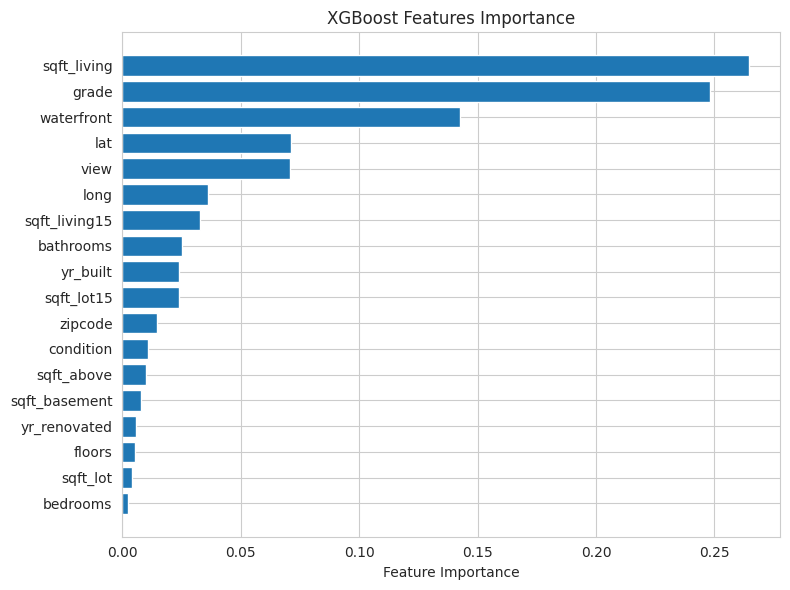

In [129]:
!pip install xgboost -q

# 2. Import thư viện
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt


# 3. Chuẩn bị dữ liệu
features = [
    "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors",
    "waterfront", "view", "condition", "grade",'lat','long', 'zipcode',
    "sqft_basement", "yr_built", "yr_renovated", "sqft_above",	'sqft_living15','sqft_lot15'
]
X = df_cleaned[features].astype('float32')
y = df_cleaned['price'].astype('float32')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Khởi tạo và huấn luyện XGBRegressor
xgb_model = XGBRegressor(
    n_estimators=200,        # số cây
    max_depth=4,             # độ sâu tối đa mỗi cây
    learning_rate=0.1,       # tốc độ học
    objective='reg:squarederror',
    random_state=42,
    verbosity=1
)

xgb_model.fit(X_train, y_train)

# 5. Dự đoán và đánh giá
y_pred = xgb_model.predict(X_test)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print(f"XGBoost RMSE: {rmse:,.2f}")
print(f"XGBoost R²:   {r2:.4f}")

# 6. Hiển thị độ quan trọng của các biến
importances = xgb_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.barh([features[i] for i in indices], importances[indices])
plt.xlabel("Feature Importance")
plt.title("XGBoost Features Importance")
plt.tight_layout()
plt.show()


Quyết định chọn mô hình này vì có RMSE (123,823) thấp nhất trong tất cả mô hình đã thử.  Tương tự, R-squared đạt 89.44% tốt nhất trong tất cả mô hình

#7. Forecasting

##7.1. TH1: Các yếu tố khác không đổi, phòng ngủ tăng từ 1 lên 2 & 3

In [178]:
import pandas as pd

# 1. Đặt giá trị giả định cho các biến khác (ngoại trừ bedrooms)
bathrooms      = 2.5
sqft_living    = 2500
sqft_lot       = 8000
floors         = 1.5
waterfront     = 0
view           = 2
condition      = 3
grade          = 7
sqft_basement  = 300
yr_built       = 1995
yr_renovated   = 2005
sqft_above     = 2200
sqft_living15  = 2400
sqft_lot15     = 8500
lat            = 47.6
long           = -122.2
zipcode        = 98103


# 2. Danh sách feature giống khi train xgb_model
features = [
    "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors",
    "waterfront", "view", "condition", "grade",'lat','long', 'zipcode',
    "sqft_basement", "yr_built", "yr_renovated", "sqft_above",  'sqft_living15','sqft_lot15'
]


sc1 = {
    "bedrooms":      1,
    "bathrooms":     bathrooms,
    "sqft_living":   sqft_living,
    "sqft_lot":      sqft_lot,
    "floors":        floors,
    "waterfront":    waterfront,
    "view":          view,
    "condition":     condition,
    "grade":         grade,
    "lat":           lat,
    "long":          long,
    "zipcode":       zipcode,
    "sqft_basement": sqft_basement,
    "yr_built":      yr_built,
    "yr_renovated":  yr_renovated,
    "sqft_above":    sqft_above,
    "sqft_living15": sqft_living15,
    "sqft_lot15":    sqft_lot15,

}
sc2 = sc1.copy(); sc2["bedrooms"] = 2
sc3 = sc1.copy(); sc3["bedrooms"] = 3

# 4. Tạo DataFrame và predict
X_beds = pd.DataFrame([sc1, sc2, sc3], columns=features).astype("float32")
preds   = xgb_model.predict(X_beds)

# 5. In kết quả
print(f"TH1: 1 phòng ngủ → {preds[0]:,.0f} USD")
print(f"TH2 :2 phòng ngủ → {preds[1]:,.0f} USD")
print(f"TH3: 3 phòng ngủ → {preds[2]:,.0f} USD")

TH1: 1 phòng ngủ → 905,636 USD
TH2 :2 phòng ngủ → 904,560 USD
TH3: 3 phòng ngủ → 873,059 USD


Giữ nguyên tổng diện tích sử dụng và các yếu tố khác, chỉ thay đổi số phòng ngủ, ta thu được:

1 phòng ngủ → 905 636 USD

2 phòng ngủ → 904 560 USD

3 phòng ngủ → 873 059 USD

Từ 1 → 2 phòng ngủ: Giá tăng nhẹ bởi nhu cầu thực tế dành cho căn hộ 2 phòng ngủ rất lớn—vừa đủ cho gia đình nhỏ hoặc cặp đôi muốn không gian sinh hoạt rộng rãi, mà không tốn quá nhiều chi phí.

Từ 2 → 3 phòng ngủ: Ngược lại, khi thêm phòng thứ ba, tổng diện tích sinh hoạt (phòng khách, bếp chung…) bị “cắt” thành nhiều ô nhỏ hơn, làm giảm không gian chung, từ đó độ rộng rãi và thoải mái cũng giảm theo dẫn tới kéo giá xuống còn 873 059 USD.

Kết luận & Chiến lược tiếp thị:

Người mua: Nếu ưu tiên không gian sinh hoạt chung thoáng đãng và cân đối chi phí, 2 phòng ngủ thường là lựa chọn tối ưu.

Người bán/Môi giới: Thay vì chỉ nói “có 3 phòng ngủ”, hãy nhấn mạnh tính linh hoạt và khu vực sinh hoạt rộng rãi (ví dụ: “phòng khách mạch lạc, bếp liên thông”), để người mua cảm nhận được giá trị thực của không gian.













##7.2. TH2: Các yếu tố khác không đổi, view tăng từ 2 lên 3 và waterfront tăng từ 0 lên 1

In [172]:
import pandas as pd

# 1. Đặt giá trị giả định cho các biến khác (ngoại trừ waterfront, view)
bedrooms       = 3
bathrooms      = 2.5
sqft_living    = 2000
sqft_lot       = 6000
floors         = 2
condition      = 3
grade          = 7
sqft_basement  = 400
yr_built       = 1995
yr_renovated   = 2005
sqft_above     = 1600
sqft_living15  = 2400
sqft_lot15     = 8500
lat            = 47.6
long           = -122.2
zipcode        = 98103

# 2. Danh sách feature đúng thứ tự như mô hình
features = [
    "bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors",
    "waterfront", "view", "condition", "grade", "lat", "long", "zipcode",
    "sqft_basement", "yr_built", "yr_renovated", "sqft_above", "sqft_living15", "sqft_lot15"
]

# 3. Tạo 2 scenario
sc1 = {
    "bedrooms":      bedrooms,
    "bathrooms":     bathrooms,
    "sqft_living":   sqft_living,
    "sqft_lot":      sqft_lot,
    "floors":        floors,
    "waterfront":    0,     # TH1: không ven sông
    "view":          1,
    "condition":     condition,
    "grade":         grade,
    "lat":           lat,
    "long":          long,
    "zipcode":       zipcode,
    "sqft_basement": sqft_basement,
    "yr_built":      yr_built,
    "yr_renovated":  yr_renovated,
    "sqft_above":    sqft_above,
    "sqft_living15": sqft_living15,
    "sqft_lot15":    sqft_lot15
}

sc2 = sc1.copy()
sc2["waterfront"] = 1  # TH2: ven sông
sc2["view"] = 3        # view đẹp

# 4. Dự đoán
X_scenarios = pd.DataFrame([sc1, sc2], columns=features).astype("float32")
preds = xgb_model.predict(X_scenarios)

# 5. In kết quả
print(f"TH1: Không ven sông, view 1  → {preds[0]:,.0f} USD")
print(f"TH2: Ven sông, view 3        → {preds[1]:,.0f} USD")


TH1: Không ven sông, view 1  → 756,263 USD
TH2: Ven sông, view 3        → 1,107,833 USD



– Trường hợp 1 (view=2, waterfront=0) → Giá dự đoán ≈ 756,263 USD

– Trường hợp 2 (view=3, waterfront=1) → Giá dự đoán ≈ 1,107,833 USD

Điều này cho thấy:

Việc có bờ sông (waterfront=1) cộng với tầm nhìn tốt hơn (view tăng một bậc) đã đẩy giá lên thêm khoảng 351,570 USD

Yếu tố cảnh quan và vị trí sát nước là những “đòn bẩy” mạnh mẽ, tạo ra độ “premium” rất cao so với các căn cùng thông số kỹ thuật khác.

Insight cho người bán & môi giới

Khi định giá và quảng bá, hãy nhấn mạnh vị trí ven sông và tầm nhìn—đây là hai đặc điểm quan trọng có thể nâng giá lên hàng trăm nghìn đô.

Đầu tư cải tạo hoặc mua lại những căn có view & waterfront tốt sẽ là chiến lược sinh lời hiệu quả.

Lưu ý cho người mua

Giá nhà cho vị trí ven sông thường đã bao gồm cả 'giá trị' cảnh quan, nên cân nhắc kỹ tài chính trước khi chi thêm ngân sách lớn cho những tính năng này.

#8. Evaluating the Model

In [179]:
print(f"XGBoost RMSE: {rmse:,.2f}")

XGBoost RMSE: 123,823.31


In [180]:
df_cleaned['price'].describe()

,price
count,1.472000e+04
mean,5.355619e+05
std,3.589020e+05
min,8.100000e+04
25%,3.190000e+05
50%,4.460000e+05
75%,6.450000e+05
max,7.700000e+06


RMSE = 123 823

So sánh với Giá trị Trung bình: Giá trị trung bình của cột price là 535,561 USD. RMSE bằng 177,277 USD, tương đương khoảng 23.1% của giá trung bình. Điều này cho thấy sai số dự đoán trung bình chiếm 23.1% của một mức giá nhà trung bình  trong tập dữ liệu.

So sánh với Độ lệch Chuẩn: Độ lệch chuẩn của price là 358,902 USD. RMSE khoảng 34.5% độ lệch chuẩn. Điều này cho thấy sai số của mô hình bằng gần một nửa mức biến động tự nhiên của dữ liệu.

Khoảng giá (Range): Giá nhà dao động từ 81.000 USD đến 7,700,000 USD, tức tổng biên độ 7,619,000 USD. RMSE 177,823 USD chiếm chỉ 1.6% của toàn bộ khoảng giá. Trong bối cảnh toàn thị trường, sai số này là một phần rất nhỏ so với biên độ giá.



Tuy nhiên RMSE này vẫn có thể chấp nhận được với những tính chất sau

🔹 1. Đặc điểm của ngành: Giá nhà biến động rất lớn, đặc biệt ở những khu vực như Seattle hoặc Bellevue – nơi có những căn nhà cao cấp lên đến 7 triệu USD.

Tính chất của ngành BĐS là dữ liệu không đồng nhất, trải dài từ nhà giá rẻ đến biệt thự, nên khoảng dao động rất rộng.

🔹 2. So với tập dữ liệu: Giá trung bình của bạn là khoảng 535,561 USD, RMSE chiếm ~23% của giá trung bình.

Nhưng nếu nhìn vào range dữ liệu từ 81,000 đến 7,7 triệu USD, thì RMSE chỉ chiếm ~1.6% → sai số nhỏ nếu xét toàn thị trường.

🔹 3. Trong ứng dụng thực tế: Nếu mô hình dùng để định giá xu hướng, tính chất tương đối thì RMSE này là chấp nhận được.
Nhưng nếu để định giá chính xác từng căn cho giao dịch, cần giảm RMSE xuống nữa, có thể nhóm phân khúc (theo khu vực, diện tích, phân khúc cao cấp/giá rẻ) để tăng độ chính xác.

📌 Kết luận: RMSE này tuy cao, nhưng vẫn hợp lý và chấp nhận được khi xem xét trong bối cảnh dữ liệu rộng, đa dạng và đặc thù ngành bất động sản. Tuy nhiên, nếu muốn tăng độ chính xác cho từng nhóm nhà, nên phân cụm dữ liệu.
